<a href="https://colab.research.google.com/github/arbitroy/ML-trials/blob/main/Tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#load csv
data = pd.read_csv("2021 New Coder Survey.csv",low_memory=False)
#get the first 5 values in the dataset
data.head()

,Timestamp,1. What is your biggest reason for learning to code?,2. What methods have you used to learn about coding? Please select all that apply.,3. Which online learning resources have you found helpful? Please select all that apply.,"4. If you have attended in-person coding-related events before, which ones have you found helpful? Please select all that apply.","5. If you have listened to coding-related podcasts before, which ones have you found helpful? Please select all that apply.","6. If you have watched coding-related YouTube videos before, which channels have you found helpful? Please select all that apply.",7. About how many hours do you spend learning each week?,8. About how many months have you been programming?,"9. Aside from university tuition, about how much money have you spent on learning to code so far (in US Dollars)?",...,45. Please tell us how satisfied you are with each of these following aspects of your present job [Job security],45. Please tell us how satisfied you are with each of these following aspects of your present job [Work-life balance],45. Please tell us how satisfied you are with each of these following aspects of your present job [Professional growth or leadership opportunities],45. Please tell us how satisfied you are with each of these following aspects of your present job [Workplace/company culture],45. Please tell us how satisfied you are with each of these following aspects of your present job [Diverse and inclusive work environment],45. Please tell us how satisfied you are with each of these following aspects of your present job [Weekly workload],46. About how many minutes does it take you to get to work each day?,47. Have you served in your country's military before?,48. Do you currently receive disability benefits from your government?,49. Do you have high speed internet at your home?
0,7/1/2021 10:10:23,To succeed in current career,"Online resources, Books, In-person bootcamps, ...","freeCodeCamp, Mozilla Developer Network (MDN),...","conferences, workshops, Meetup.com events",The Changelog,"CS Dojo, freeCodeCamp",4.0,120,NaN,...,Somewhat satisfied,Somewhat dissatisfied,I do not know,Somewhat satisfied,Somewhat satisfied,Very dissatisfied,I work from home,No,No,Yes
1,7/1/2021 10:31:01,To change careers,"Online resources, Books, Online bootcamps","freeCodeCamp, Mozilla Developer Network (MDN),...",I haven't attended any in-person coding-relate...,"The Changelog, Code Newbie Podcast","Adrian Twarog, Code with Ania Kubów, Coder Cod...",10.0,6,30,...,Very dissatisfied,Somewhat satisfied,Somewhat dissatisfied,Somewhat dissatisfied,Somewhat satisfied,Somewhat satisfied,15 to 29 minutes,No,Yes,Yes
2,7/1/2021 10:42:31,To change careers,"Online resources, Books, Hackathons, Meetup.co...","freeCodeCamp, Mozilla Developer Network (MDN),...",Meetup.com events,I haven't listened to any podcasts,"AmigosCode, Dev Ed, freeCodeCamp, Kevin Powell...",30.0,48,300,...,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,I am not working,No,No,Yes
3,7/1/2021 11:06:43,As a hobby,"Online resources, Books","freeCodeCamp, Mozilla Developer Network (MDN),...",I haven't attended any in-person coding-relate...,"Darknet Diaries, Real Python Podcast","freeCodeCamp, Traversy Media",NaN,36,0,...,NaN,NaN,NaN,NaN,NaN,NaN,I am not working,No,No,No
4,7/1/2021 11:14:31,To start your first career,"Online resources, Books, Online bootcamps","freeCodeCamp, Stack Overflow, Coursera, Udemy",I haven't attended any in-person coding-relate...,Talk Python to Me,"freeCodeCamp, The Net Ninja, Traversy Media",2.0,24,5000,...,Somewhat dissatisfied,Somewhat satisfied,Somewhat dissatisfied,Somewhat satisfied,Somewhat dissatisfied,Somewhat dissatisfied,45 to 60 minutes,No,No,Yes


In [ ]:
#inspect data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18126 entries, 0 to 18125
Data columns (total 63 columns):
 #   Column                                                                                                                                                                      Non-Null Count  Dtype  
---  ------                                                                                                                                                                      --------------  -----  
 0   Timestamp                                                                                                                                                                   18126 non-null  int64  
 1   1. What is your biggest reason for learning to code?                                                                                                                        18126 non-null  int64  
 2   2. What methods have you used to learn about coding? Please select all that apply.

In [ ]:
# Get data types of all columns
column_data_types = data.dtypes

# Filter columns that have object data type
object_columns = column_data_types[column_data_types == 'object'].index.tolist()
print(object_columns)

['Timestamp', '1. What is your biggest reason for learning to code?', '2. What methods have you used to learn about coding? Please select all that apply.', '3. Which online learning resources have you found helpful? Please select all that apply.', '4. If you have attended in-person coding-related events before, which ones have you found helpful? Please select all that apply.', '5. If you have listened to coding-related podcasts before, which ones have you found helpful? Please select all that apply.', '6. If you have watched coding-related YouTube videos before, which channels have you found helpful? Please select all that apply.', '8. About how many months have you been programming?', '9. Aside from university tuition, about how much money have you spent on learning to code so far (in US Dollars)?', '10. Are you already employed in a software development job?', '11. If you are already employed as a developer, is this your first software development job? ', '12. If you are NOT already 

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

Timestamp                                                                                                                             0
1. What is your biggest reason for learning to code?                                                                                 19
2. What methods have you used to learn about coding? Please select all that apply.                                                   20
3. Which online learning resources have you found helpful? Please select all that apply.                                             22
4. If you have attended in-person coding-related events before, which ones have you found helpful? Please select all that apply.    183
                                                                                                                                   ... 
45. Please tell us how satisfied you are with each of these following aspects of your present job [Weekly workload]                 622
46. About how many minutes does it take you to g

In [ ]:
# Basic statistics
basic_stats = data.describe()
print(basic_stats)


       7. About how many hours do you spend learning each week?  \
count                                        1922.000000          
mean                                           13.438975          
std                                            12.881148          
min                                             0.000000          
25%                                             5.000000          
50%                                            10.000000          
75%                                            20.000000          
max                                           100.000000          

       23. How old are you?  \
count           1969.000000   
mean              28.283393   
std                9.668748   
min                6.000000   
25%               21.000000   
50%               26.000000   
75%               33.000000   
max              100.000000   

       41. Before you got your last job, how many months did you spend looking for a job?  \
count                  

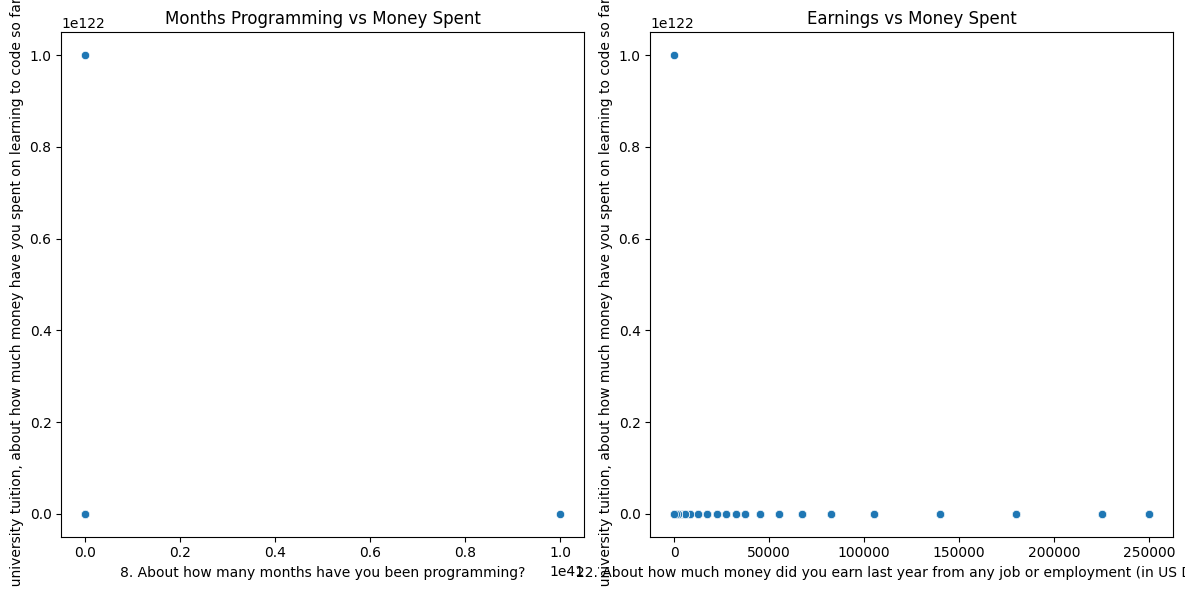

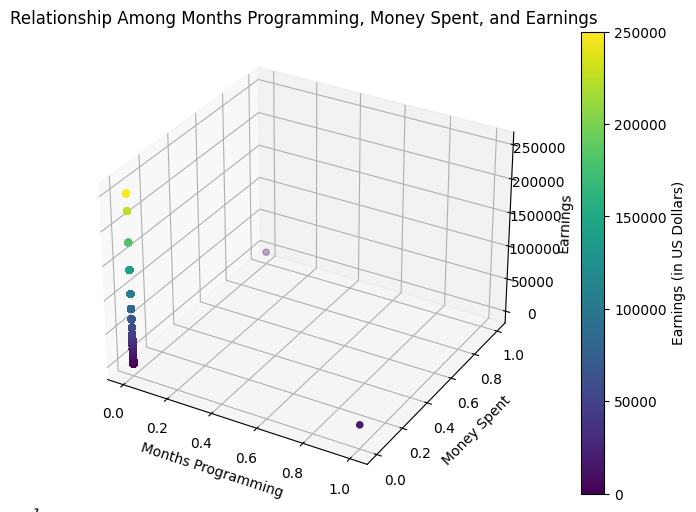

In [ ]:
def clean_currency(x):
    """Convert currency strings to floats."""
    if isinstance(x, str):
        # Handle special cases like 'None' or 'I don’t know'
        if x == 'None' or 'don’t know' in x.lower():
            return 0  # Or another appropriate default value
        # Handle unexpected string values
        if "don't want" in x.lower():
            return 0  # Set to 0 or another appropriate default value
        # Handle special cases like 'Under 1000'
        if 'Under' in x:
            return 1000  # Adjust as necessary
        # Handle range values like '40000 to 49999'
        if ' to ' in x:
            low, high = map(float, x.replace('$', '').replace(',', '').split(' to '))
            return (low + high) / 2
        # Handle values like '250000 or over'
        if ' or over' in x:
            return float(x.replace('$', '').replace(',', '').replace(' or over', ''))
        # Handle single values like '$40,000'
        return float(x.replace('$', '').replace(',', ''))
    return x

# Apply the function to the relevant columns
data['8. About how many months have you been programming?'] = data['8. About how many months have you been programming?'].apply(clean_currency).astype(float)
data['9. Aside from university tuition, about how much money have you spent on learning to code so far (in US Dollars)?'] = data['9. Aside from university tuition, about how much money have you spent on learning to code so far (in US Dollars)?'].apply(clean_currency).astype(float)
data['22. About how much money did you earn last year from any job or employment (in US Dollars)? '] = data['22. About how much money did you earn last year from any job or employment (in US Dollars)? '].apply(clean_currency).astype(float)
# Exploring the Relationship Between Two Features
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='8. About how many months have you been programming?',
                y='9. Aside from university tuition, about how much money have you spent on learning to code so far (in US Dollars)?',
                data=data)
plt.title('Months Programming vs Money Spent')

plt.subplot(1, 2, 2)
sns.scatterplot(x='22. About how much money did you earn last year from any job or employment (in US Dollars)? ',
                y='9. Aside from university tuition, about how much money have you spent on learning to code so far (in US Dollars)?',
                data=data)
plt.title('Earnings vs Money Spent')

plt.tight_layout()
plt.show()

# Exploring the Relationship Among Three Features
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(data['8. About how many months have you been programming?'],
                     data['9. Aside from university tuition, about how much money have you spent on learning to code so far (in US Dollars)?'],
                     data['22. About how much money did you earn last year from any job or employment (in US Dollars)? '],
                     c=data['22. About how much money did you earn last year from any job or employment (in US Dollars)? '], # Adding the color mapping
                     cmap='viridis')

ax.set_xlabel('Months Programming')
ax.set_ylabel('Money Spent')
ax.set_zlabel('Earnings')

plt.title('Relationship Among Months Programming, Money Spent, and Earnings')

# Adding a color bar to the plot
plt.colorbar(scatter, label='Earnings (in US Dollars)')

plt.show()

# Demographics Analysis

Age Distribution: A histogram (sns.histplot) is created to show the distribution of respondents' ages. The data is binned into 20 age groups, and the plot displays the count of respondents in each age group.

Gender Distribution: A bar plot (sns.barplot) is generated to display the gender distribution of the respondents. The top 10 gender categories are selected based on the count, and the plot shows the number of respondents for each gender category.

Geographic Distribution: A count plot (sns.countplot) is used to visualize the geographic distribution of the respondents. The plot shows the count of respondents from different regions around the world.

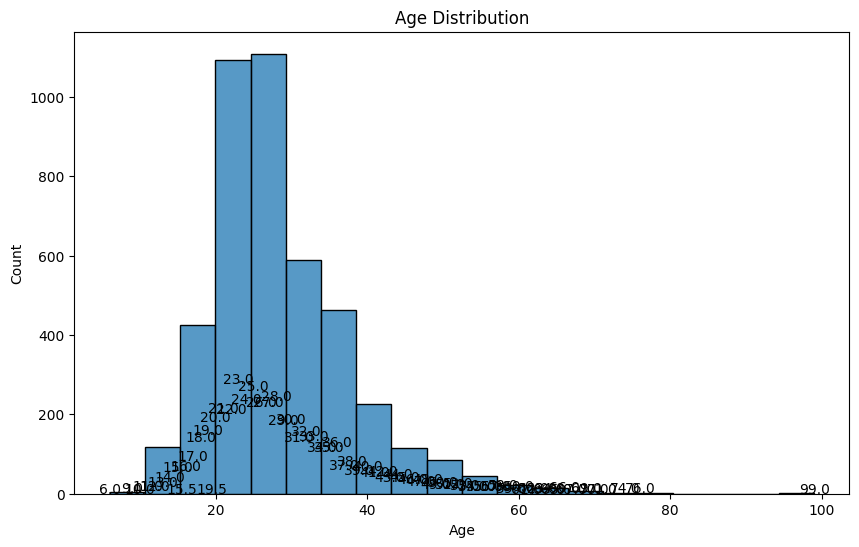

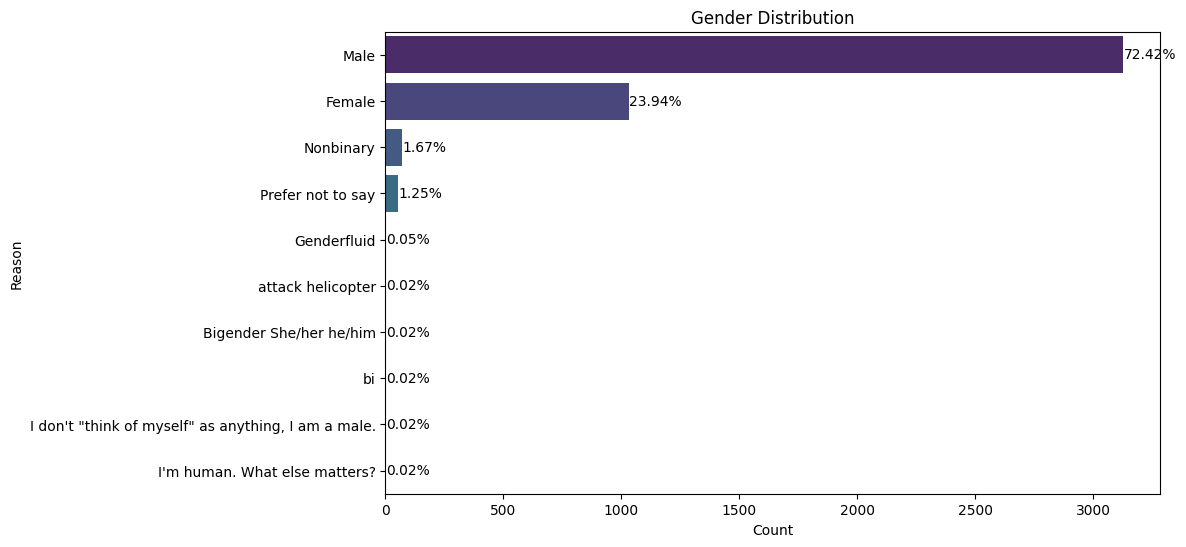

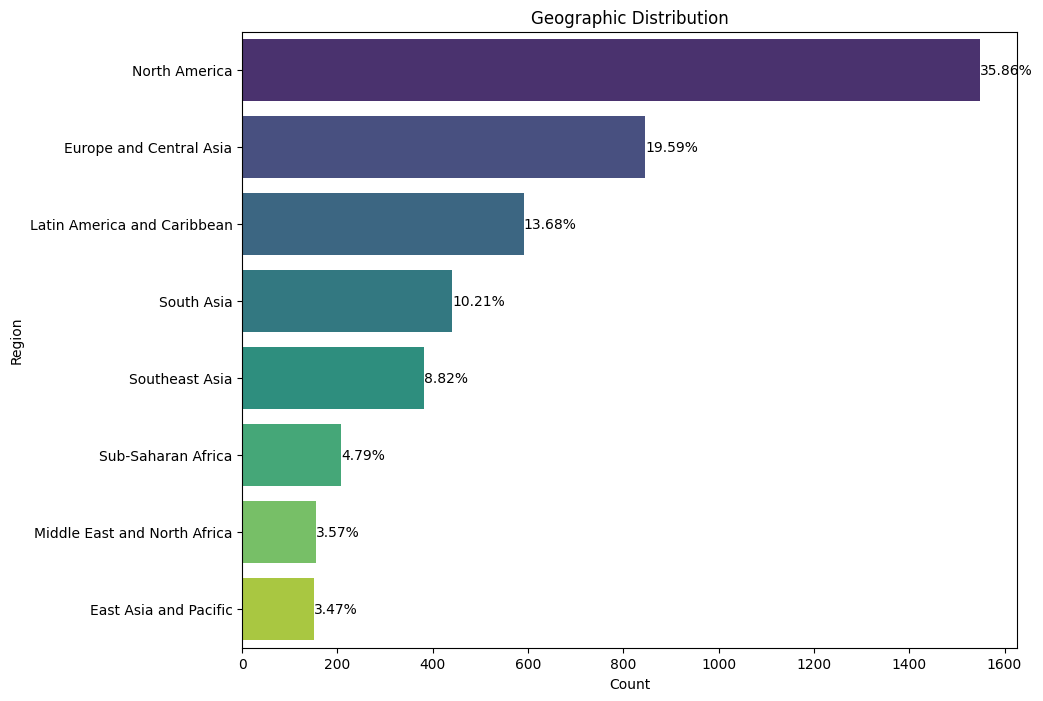

In [ ]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='23. How old are you?', bins=20, kde=False)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

# Display age values closer to the top of the bars
for age, count in zip(data['23. How old are you?'].value_counts().index, data['23. How old are you?'].value_counts()):
    plt.text(age, count + 0.5, str(age), ha='center')

plt.show()
# Gender distribution
top_n = 10
reason_counts = data['24. Which of the following best represents how you think of yourself?'].value_counts().head(top_n)

plt.figure(figsize=(10, 6))
ax = sns.barplot(y=reason_counts.index, x=reason_counts.values, palette='viridis')

# Display percentages on the bars
total_gender = len(data['24. Which of the following best represents how you think of yourself?'])
for i, value in enumerate(reason_counts.values):
    percentage = (value / total_gender) * 100
    ax.text(value + 0.1, i, f'{percentage:.2f}%', va='center')

plt.title('Gender Distribution')
plt.xlabel('Count')
plt.ylabel('Reason')
plt.show()

# Geographic distribution
plt.figure(figsize=(10, 8))
geo_counts = data['26. Which part of the world do you live in?'].value_counts()

ax = sns.barplot(y=geo_counts.index, x=geo_counts.values, palette='viridis')

# Display percentages on the bars
total_geo = len(data['26. Which part of the world do you live in?'])
for i, value in enumerate(geo_counts.values):
    percentage = (value / total_geo) * 100
    ax.text(value + 0.1, i, f'{percentage:.2f}%', va='center')

plt.title('Geographic Distribution')
plt.xlabel('Count')
plt.ylabel('Region')
plt.show()

# Learning and Development Analysis

Analyze the reasons for learning to code.

Visualize the methods and resources used for learning.

Distribution of Weekly Learning Hours:

Histogram to show the distribution of hours spent learning each week.

Relationship between Age and Weekly Learning Hours:

Scatter plot to see if there's any correlation between age and the number of hours spent learning each week.

Monthly Programming Experience vs. Weekly Learning Hours:

Histogram to visualize the distribution of weekly learning hours based on different levels of monthly programming experience.

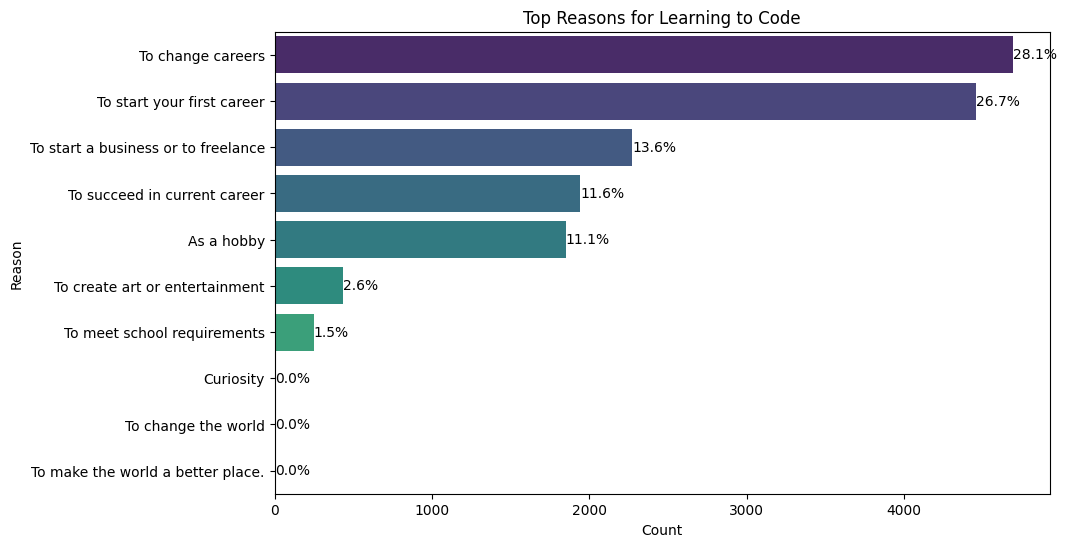

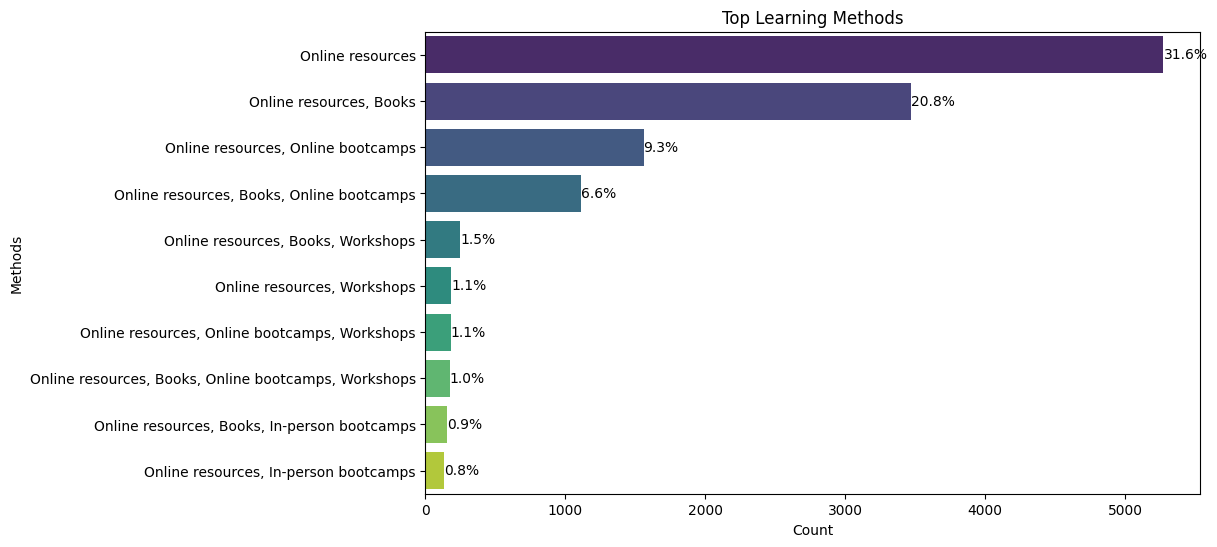

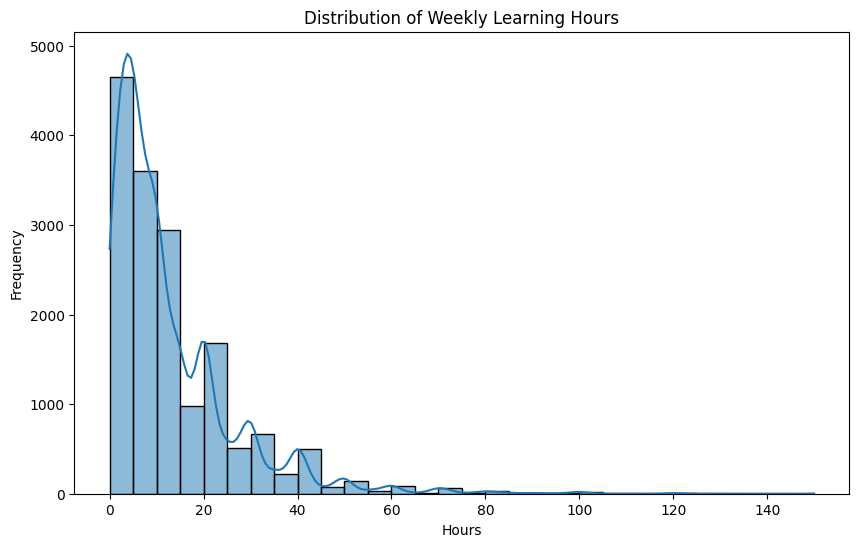

Bachelor’s degree                           5087
High school diploma or equivalent (GED)     2826
Some college credit, no degree              2626
Some high school                            1763
Master's degree (non-professional)          1055
Professional degree (MBA, MD, JD, etc.)      734
No high school (secondary school)            676
Trade, technical, or vocational training     655
Associate’s degree                           594
Ph.D.                                        119
Name: 32. What is the highest degree or level of school you have completed?, dtype: int64


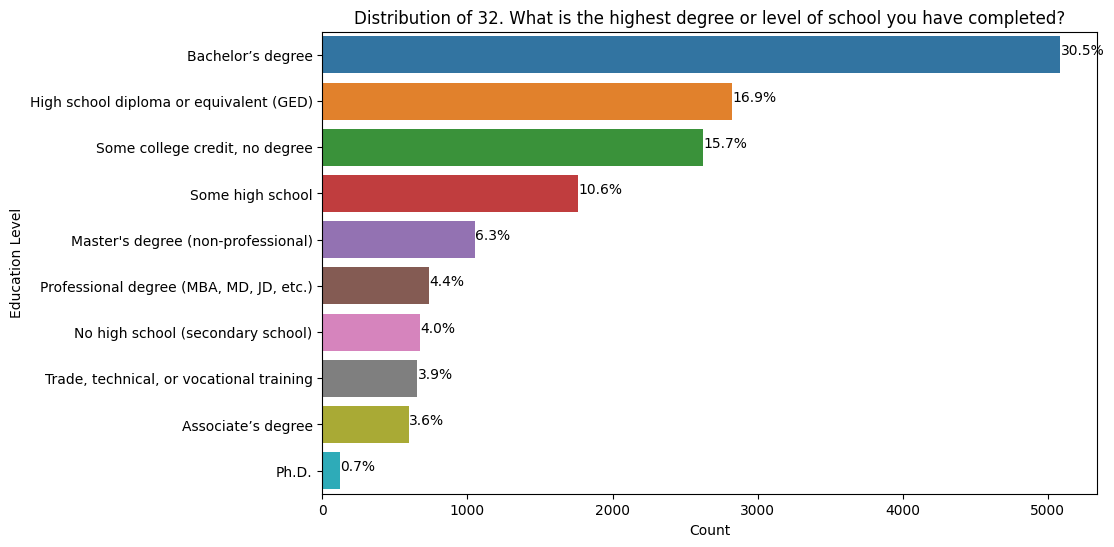

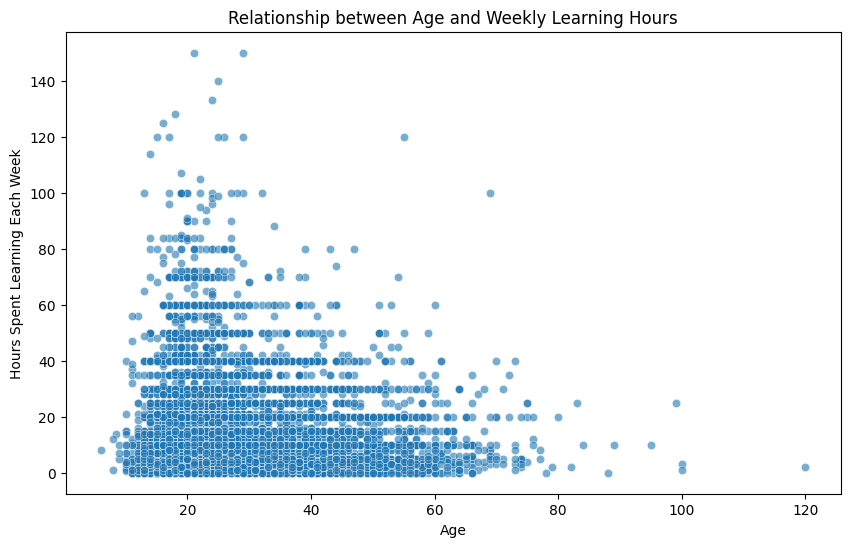

count    1.669500e+04
mean     5.989817e+36
std      7.739391e+38
min      0.000000e+00
25%      1.000000e+00
50%      4.000000e+00
75%      1.200000e+01
max      1.000000e+41
Name: 8. About how many months have you been programming?, dtype: float64


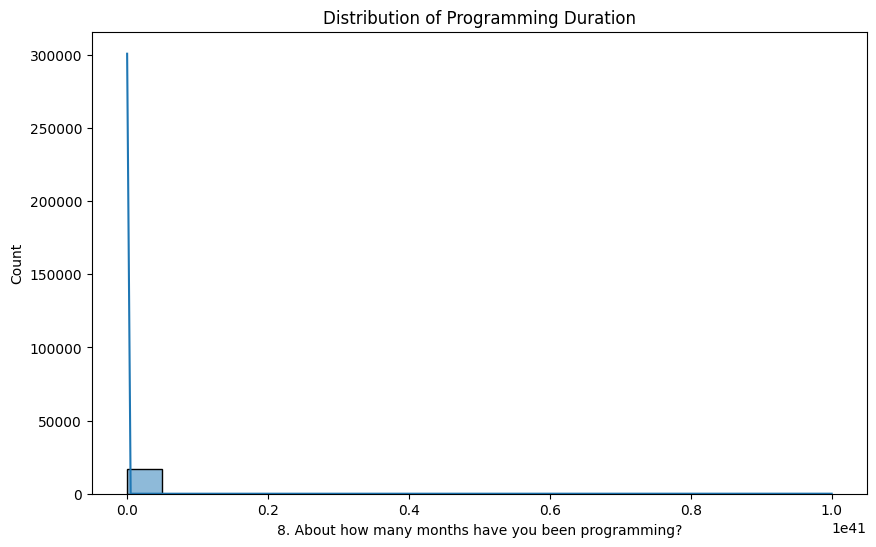

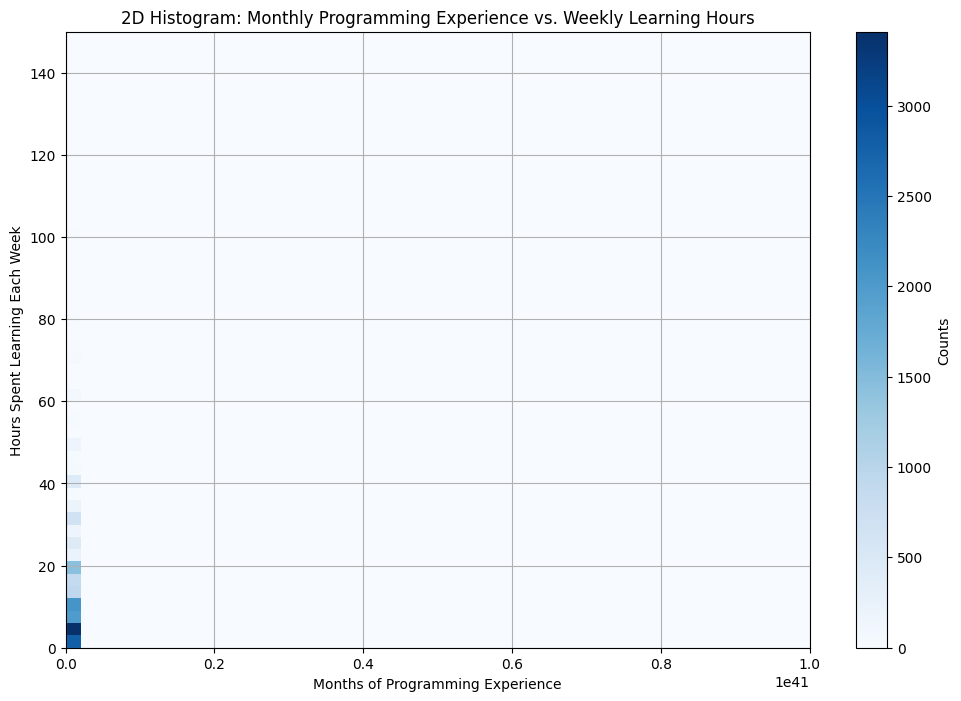

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to annotate bar plots with percentages
def annotate_bars(ax, total_count):
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width() / total_count)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height() / 2
        ax.annotate(percentage, (x, y), ha='left', va='center')

# Top N reasons for learning to code
top_n = 10
reason_counts = data['1. What is your biggest reason for learning to code?'].value_counts().head(top_n)

plt.figure(figsize=(10, 6))
ax = sns.barplot(y=reason_counts.index, x=reason_counts.values, palette='viridis')
plt.title('Top Reasons for Learning to Code')
plt.xlabel('Count')
plt.ylabel('Reason')

# Annotate the bars with percentages
annotate_bars(ax, len(data['1. What is your biggest reason for learning to code?']))

plt.show()

# Top N methods for learning
top_n = 10
method_counts = data['2. What methods have you used to learn about coding? Please select all that apply.'].value_counts().head(top_n)

plt.figure(figsize=(10, 6))
ax = sns.barplot(y=method_counts.index, x=method_counts.values, palette='viridis')
plt.title('Top Learning Methods')
plt.xlabel('Count')
plt.ylabel('Methods')

# Annotate the bars with percentages
annotate_bars(ax, len(data['2. What methods have you used to learn about coding? Please select all that apply.']))

plt.show()

# Distribution of Weekly Learning Hours
plt.figure(figsize=(10, 6))
sns.histplot(data['7. About how many hours do you spend learning each week?'].dropna(), bins=30, kde=True)
plt.title('Distribution of Weekly Learning Hours')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.show()
# Feature 3: '32. What is the highest degree or level of school you have completed?'
education_level_counts = data['32. What is the highest degree or level of school you have completed?'].value_counts()
print(education_level_counts)

feature_name = '32. What is the highest degree or level of school you have completed?'

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data, y=feature_name, order=data[feature_name].value_counts().index)

# Annotate each bar with the percentage of the category it represents
total = len(data[feature_name])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width() / total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y))

plt.title(f'Distribution of {feature_name}')
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.show()
# Relationship between Age and Weekly Learning Hours
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='23. How old are you?', y='7. About how many hours do you spend learning each week?', alpha=0.6)
plt.title('Relationship between Age and Weekly Learning Hours')
plt.xlabel('Age')
plt.ylabel('Hours Spent Learning Each Week')
plt.show()
programming_duration_stats = data['8. About how many months have you been programming?'].describe()
print(programming_duration_stats)
data['8. About how many months have you been programming?'] = pd.to_numeric(data['8. About how many months have you been programming?'], errors='coerce')
data['8. About how many months have you been programming?'].fillna(0, inplace=True)
plt.figure(figsize=(10, 6))
sns.histplot(data['8. About how many months have you been programming?'], bins=20, kde=True)
plt.title('Distribution of Programming Duration')
plt.show()
# Filter and convert the data to the correct data type
x_data = data['8. About how many months have you been programming?'].dropna().astype(float)
y_data = data['7. About how many hours do you spend learning each week?'].dropna().astype(float)

# Ensure both arrays have the same length by truncating to the minimum length
min_length = min(len(x_data), len(y_data))
x_data = x_data[:min_length]
y_data = y_data[:min_length]

# Create 2D histogram
plt.figure(figsize=(12, 8))
plt.hist2d(x_data, y_data, bins=50, cmap='Blues')
plt.colorbar(label='Counts')
plt.title('2D Histogram: Monthly Programming Experience vs. Weekly Learning Hours')
plt.xlabel('Months of Programming Experience')
plt.ylabel('Hours Spent Learning Each Week')
plt.grid(True)
plt.show()

# Career and Employment Analysis

Interest in Software Development Career: A count plot (sns.countplot) is utilized to illustrate the interest level of respondents in pursuing a career in software development. The plot displays the count of respondents for different response categories, indicating their interest in a software development career.

Job Satisfaction: A stacked bar plot is generated to depict various aspects of job satisfaction among respondents. The data is processed to count the number of respondents for different satisfaction levels across multiple aspects related to job satisfaction. The stacked bar plot visualizes these counts, allowing for a comparison of satisfaction levels across different aspects of the job.

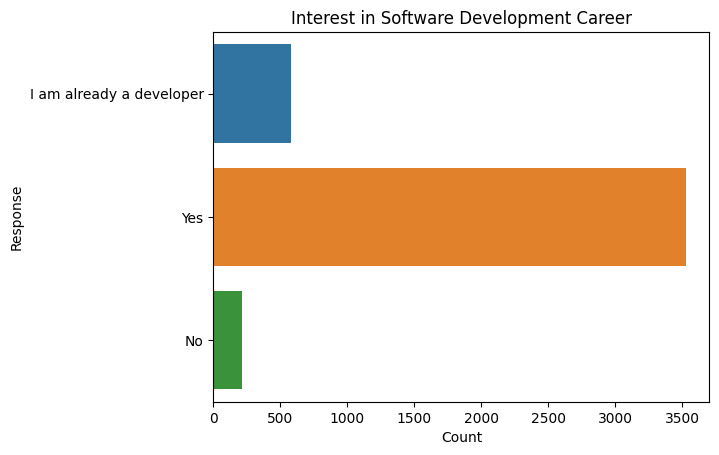

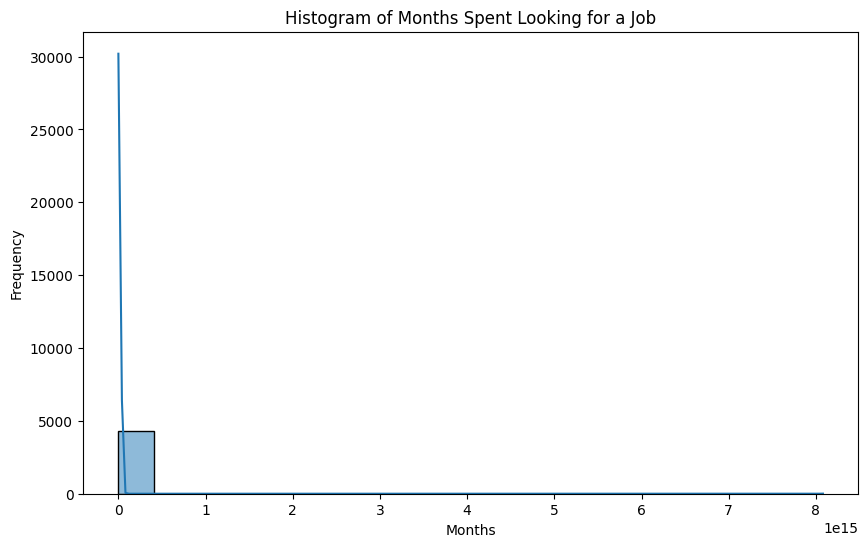

count    4.319000e+03
mean     1.873306e+12
std      1.229599e+14
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      4.000000e+00
max      8.080808e+15
Name: 41. Before you got your last job, how many months did you spend looking for a job?, dtype: float64


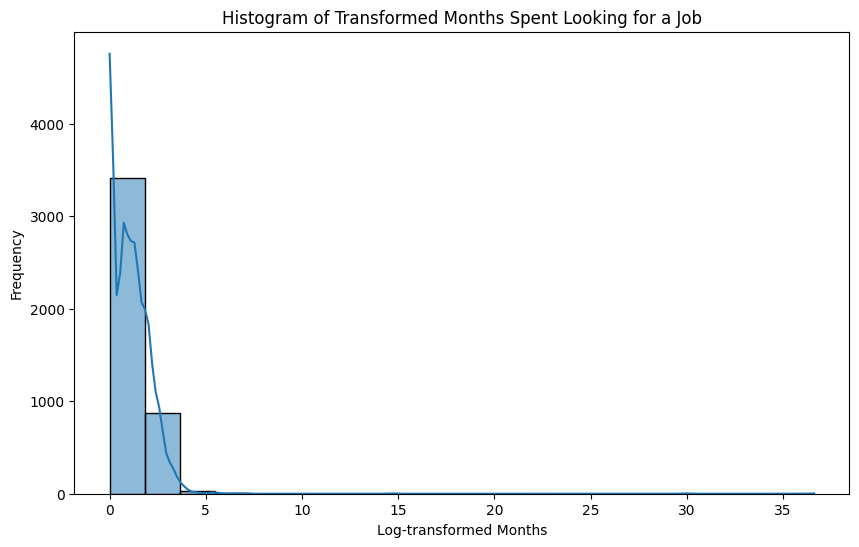

count    4319.000000
mean        1.014112
std         1.189438
min         0.000000
25%         0.000000
50%         0.693147
75%         1.609438
max        36.628268
Name: 41. Before you got your last job, how many months did you spend looking for a job?, dtype: float64


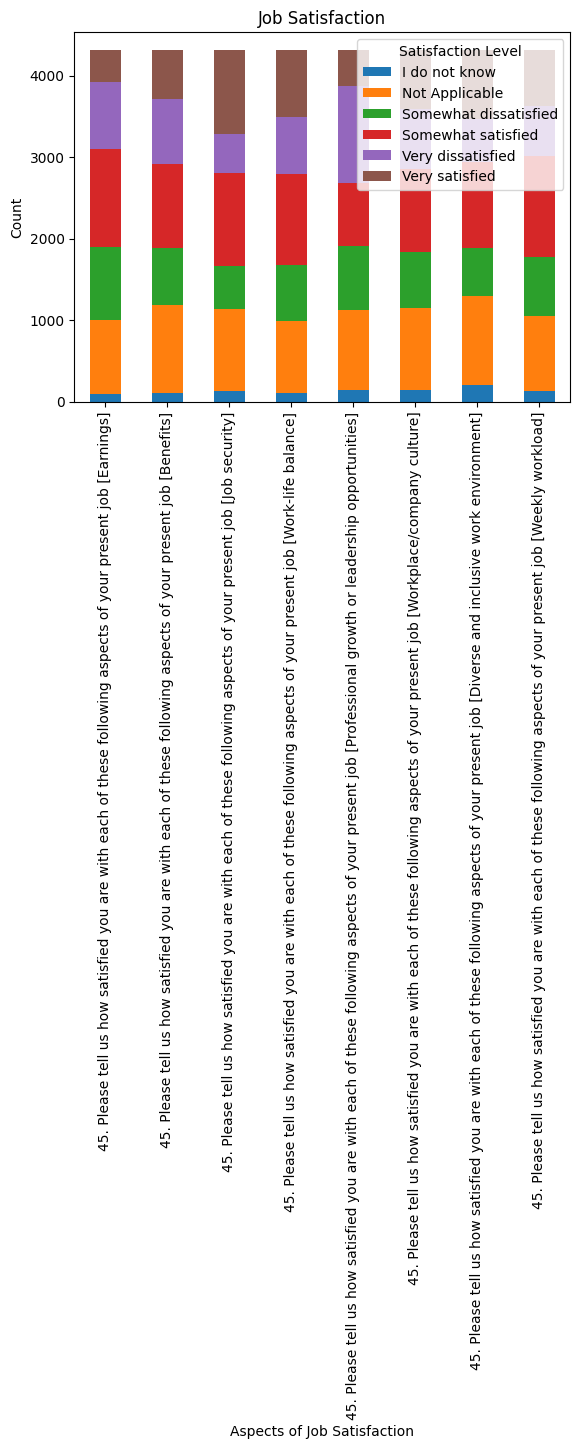

In [ ]:
import numpy as np
# Career interests
sns.countplot(data=data, y='12. If you are NOT already a developer, are you interested in a software development career?')
plt.title('Interest in Software Development Career')
plt.xlabel('Count')
plt.ylabel('Response')
plt.show()


data_to_plot = data['41. Before you got your last job, how many months did you spend looking for a job?']

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data_to_plot, bins=20, kde=True)
plt.title('Histogram of Months Spent Looking for a Job')
plt.xlabel('Months')
plt.ylabel('Frequency')
plt.show()
print(data_to_plot.describe())
# Transform the data using natural logarithm
transformed_data = np.log1p(data_to_plot)  # Using log1p to handle 0 values gracefully

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(transformed_data, bins=20, kde=True)
plt.title('Histogram of Transformed Months Spent Looking for a Job')
plt.xlabel('Log-transformed Months')
plt.ylabel('Frequency')
plt.show()

# Descriptive statistics
print(transformed_data.describe())
# Job satisfaction
satisfaction_columns = [col for col in data.columns if 'Please tell us how satisfied you are' in col]
satisfaction_data = data[satisfaction_columns].apply(lambda x: x.value_counts()).transpose()
satisfaction_data.plot(kind='bar', stacked=True)
plt.title('Job Satisfaction')
plt.xlabel('Aspects of Job Satisfaction')
plt.ylabel('Count')
plt.legend(title='Satisfaction Level')
plt.show()

# Financial and Debt Analysis

Spending on Learning to Code: A histogram (sns.histplot) is constructed to showcase the distribution of the amount of money respondents have spent on learning to code, excluding university tuition fees.

Debt Situation: The code identifies columns related to the amount of debt a household has across various categories.The plot visualizes the different types of debt and their respective total amounts in descending order.

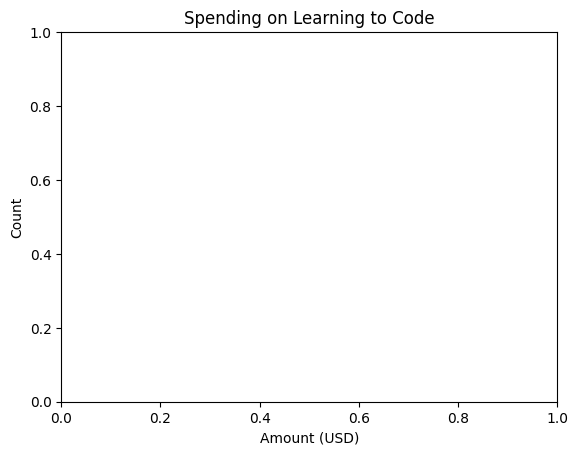

None                      5234
Under $1,000              1609
$1,000 to $2,999           981
$10,000 to $14,999         809
$3,000 to $4,999           669
$20,000 to $24,999         633
$40,000 to $49,999         599
$5,000 to $6,999           547
$15,000 to $19,999         530
$50,000 to $59,999         508
$7,000 to $9,999           492
$30,000 to $34,999         484
$25,000 to $29,999         476
$60,000 to $74,999         440
$35,000 to $39,999         365
$75,000 to $89,999         323
$90,000 to $119,999        277
$120,000 to $159,999       137
I don't want to answer     122
I don’t know                60
$160,000 to $199,999        39
$250,000 or over            32
$200,000 to $249,999        15
Name: 22. About how much money did you earn last year from any job or employment (in US Dollars)? , dtype: int64


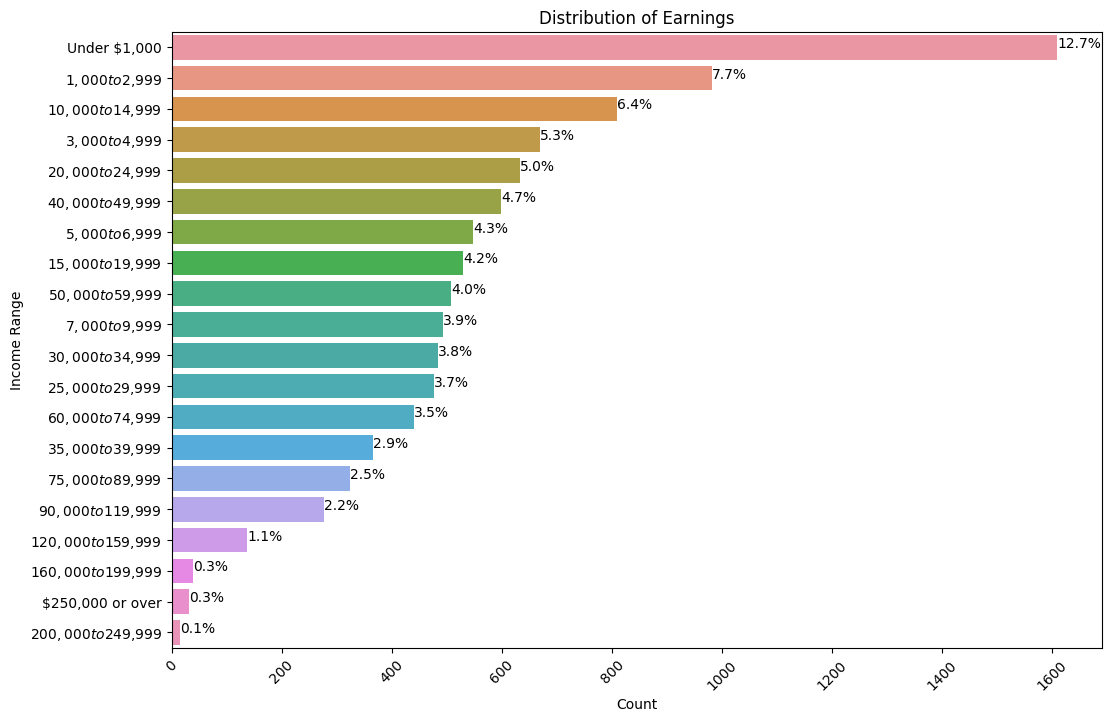

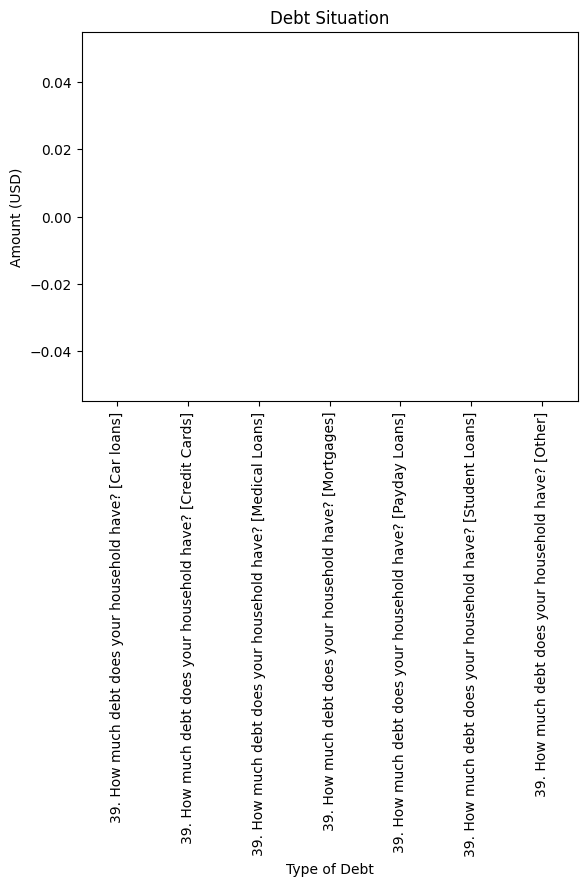

In [ ]:
# Spending on education
# sns.histplot(data=data, x='9. Aside from university tuition, about how much money have you spent on learning to code so far (in US Dollars)?', bins=20)
plt.title('Spending on Learning to Code')
plt.xlabel('Amount (USD)')
plt.ylabel('Count')
plt.show()
# Assuming your income column is named 'Income'
income_statistics = data['22. About how much money did you earn last year from any job or employment (in US Dollars)? '].value_counts()

# Display the statistics
print(income_statistics)

# Remove rows where income is 'I don't want to answer', 'I don’t know', or 'None'
filtered_data = data[
    ~data['22. About how much money did you earn last year from any job or employment (in US Dollars)? '].isin([
        "I don't want to answer",
        "I don’t know",
        "None"
    ])
]

# Plotting
plt.figure(figsize=(12, 8))
sns.countplot(data=filtered_data, y='22. About how much money did you earn last year from any job or employment (in US Dollars)? ', order=filtered_data['22. About how much money did you earn last year from any job or employment (in US Dollars)? '].value_counts().index)
plt.title('Distribution of Earnings')
plt.xlabel('Count')
plt.ylabel('Income Range')
plt.xticks(rotation=45)

# Adding percentages to the bars
total = len(filtered_data['22. About how much money did you earn last year from any job or employment (in US Dollars)? '])
for p in plt.gca().patches:
    percentage = '{:.1f}%'.format(100 * p.get_width() / total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height()/2
    plt.gca().annotate(percentage, (x, y))

plt.show()


# Debt
# Create the debt_columns list
debt_columns = [col for col in data.columns if 'How much debt does your household have?' in col]

if not debt_columns:
    print("No debt columns found!")
else:
    # 3. Sum the data
    debt_data = data[debt_columns].apply(pd.to_numeric, errors='coerce').sum().sort_values(ascending=False).dropna()

    # 4. Plot the data
    debt_data.plot(kind='bar')
    plt.title('Debt Situation')
    plt.xlabel('Type of Debt')
    plt.ylabel('Amount (USD)')
    plt.show()


#  Accessibility and Infrastructure:

**Distribution of Internet Access**:

A bar chart or pie chart showing the proportion of respondents with high-speed internet access at home.

**Geographic Distribution:**

A heatmap or choropleth map to visualize the distribution of respondents across different parts of the world or within specific regions/countries.

**Military Service and Disability Benefits:**

A bar chart to show the proportion of respondents who have served in the military or currently receive disability benefits.

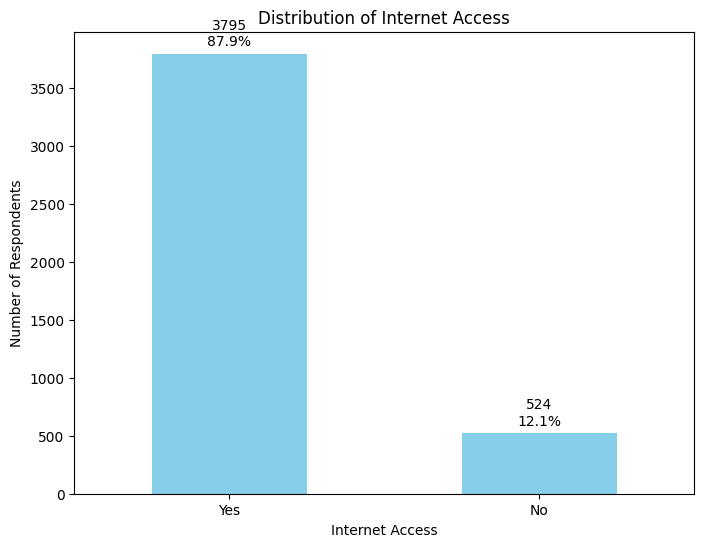

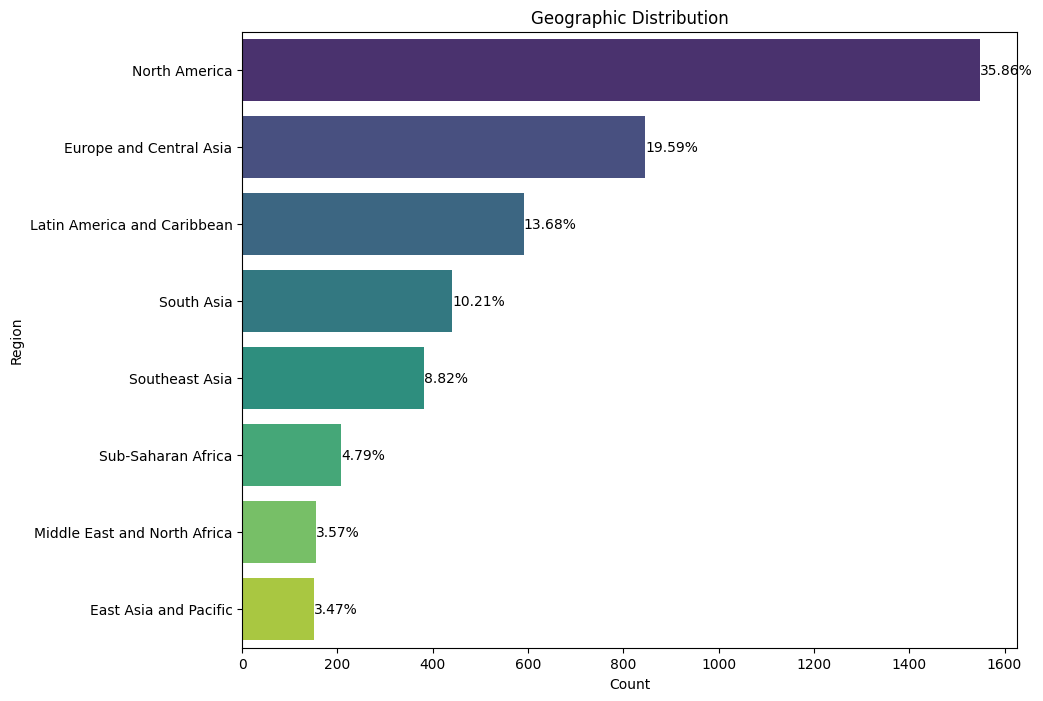

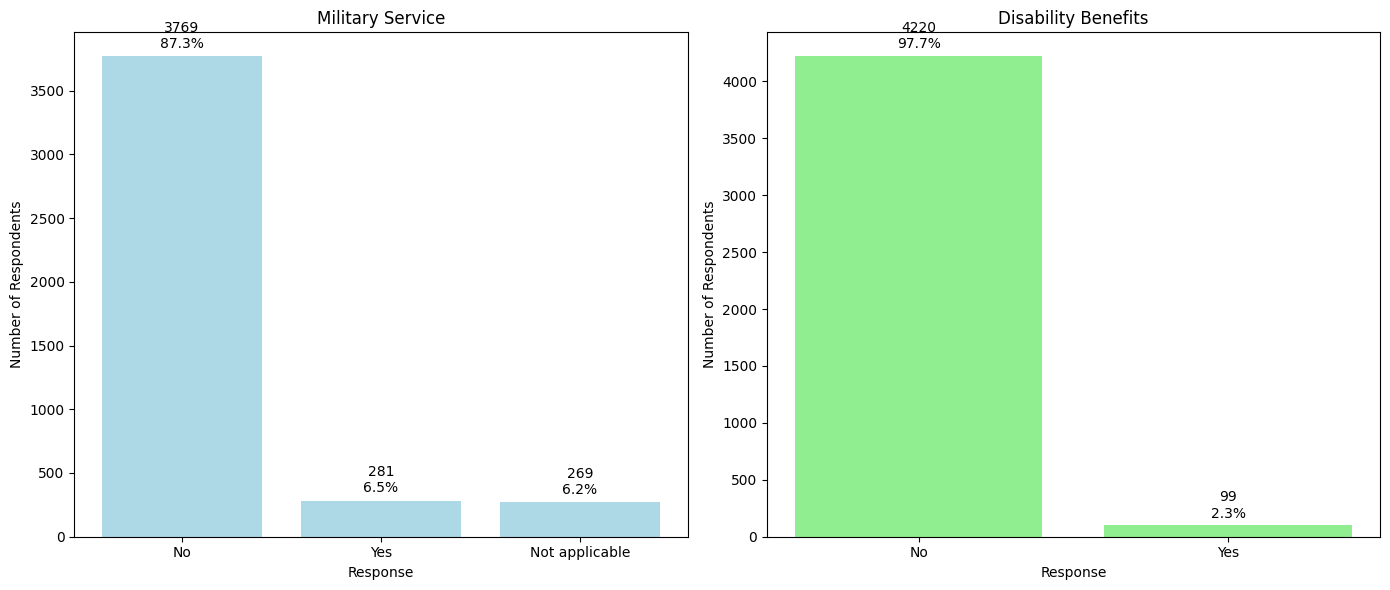

In [ ]:
def annotate_bars(ax, counts):
    total_count = sum(counts)
    for i, p in enumerate(ax.patches):
        count = counts[i]
        percentage = '{:.1f}%'.format(100 * count / total_count)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height() + 0.01 * total_count  # Adjust the position based on your preference
        ax.annotate(f'{count}\n{percentage}', (x, y), ha='center', va='bottom')

# Distribution of Internet Access
internet_access_counts = data['49. Do you have high speed internet at your home?'].value_counts()
plt.figure(figsize=(8, 6))
ax = internet_access_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Internet Access')
plt.xlabel('Internet Access')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=0)

# Annotate the bars with numbers and percentages
annotate_bars(ax, internet_access_counts.values)

plt.show()


# Geographic distribution
plt.figure(figsize=(10, 8))
geo_counts = data['26. Which part of the world do you live in?'].value_counts()

ax = sns.barplot(y=geo_counts.index, x=geo_counts.values, palette='viridis')

# Display percentages on the bars
total_geo = len(data['26. Which part of the world do you live in?'])
for i, value in enumerate(geo_counts.values):
    percentage = (value / total_geo) * 100
    ax.text(value + 0.1, i, f'{percentage:.2f}%', va='center')

plt.title('Geographic Distribution')
plt.xlabel('Count')
plt.ylabel('Region')
plt.show()

# Military Service and Disability Benefits
military_counts = data['47. Have you served in your country\'s military before?'].value_counts()
disability_counts = data['48. Do you currently receive disability benefits from your government?'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Military Service
ax1 = axes[0].bar(military_counts.index, military_counts.values, color='lightblue')
axes[0].set_title('Military Service')
axes[0].set_xlabel('Response')
axes[0].set_ylabel('Number of Respondents')

# Annotate the bars with numbers and percentages
annotate_bars(axes[0], military_counts.values)

# Disability Benefits
ax2 = axes[1].bar(disability_counts.index, disability_counts.values, color='lightgreen')
axes[1].set_title('Disability Benefits')
axes[1].set_xlabel('Response')
axes[1].set_ylabel('Number of Respondents')

# Annotate the bars with numbers and percentages
annotate_bars(axes[1], disability_counts.values)

plt.tight_layout()
plt.show()

# Cluster Analysis

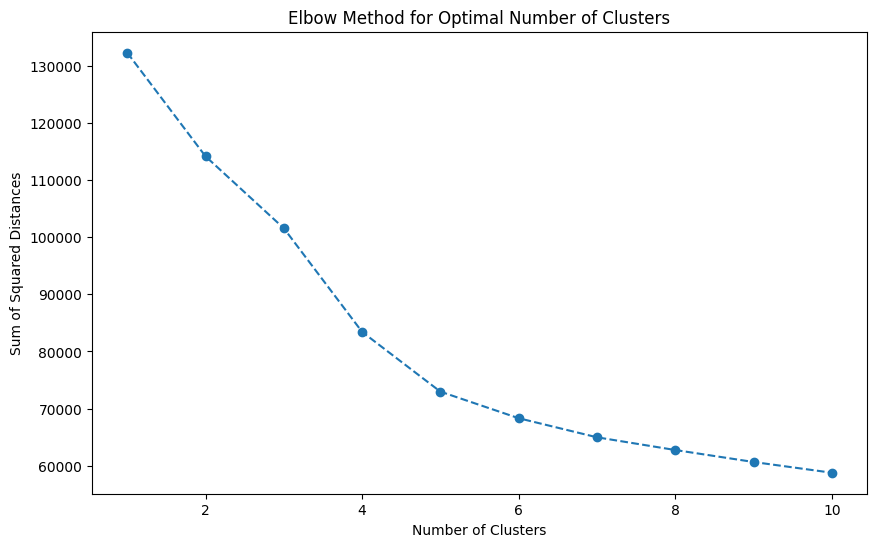

         7. About how many hours do you spend learning each week?  \
Cluster                                                             
0                                                 7.181012          
1                                                 0.000000          
2                                                38.800428          
3                                                 8.632012          
4                                                14.000000          

         23. How old are you?  \
Cluster                         
0                   22.437469   
1                   45.000000   
2                   24.420771   
3                   40.905316   
4                   37.000000   

         41. Before you got your last job, how many months did you spend looking for a job?  \
Cluster                                                                                       
0                                                 0.950530                                    

In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
# Handle missing values for selected columns
data['23. How old are you?'].fillna(data['23. How old are you?'].median(), inplace=True)
data['24. Which of the following best represents how you think of yourself?'].fillna('Unknown', inplace=True)
data['26. Which part of the world do you live in?'].fillna('Unknown', inplace=True)
data['32. What is the highest degree or level of school you have completed?'].fillna('Unknown', inplace=True)
data['7. About how many hours do you spend learning each week?'].fillna(0, inplace=True)
data['8. About how many months have you been programming?'].fillna(0, inplace=True)
data['9. Aside from university tuition, about how much money have you spent on learning to code so far (in US Dollars)?'].fillna(0, inplace=True)
data['12. If you are NOT already a developer, are you interested in a software development career?'].fillna('Unknown', inplace=True)
data['45. Please tell us how satisfied you are with each of these following aspects of your present job [Earnings]'].fillna('Unknown', inplace=True)
# Apply logarithm transformation
data['41. Before you got your last job, how many months did you spend looking for a job?'] = np.log1p(data['41. Before you got your last job, how many months did you spend looking for a job?'])
# Define selected features
features = [
    '23. How old are you?',
    '24. Which of the following best represents how you think of yourself?',
    '26. Which part of the world do you live in?',
    '32. What is the highest degree or level of school you have completed?',
    '7. About how many hours do you spend learning each week?',
    '8. About how many months have you been programming?',
    '9. Aside from university tuition, about how much money have you spent on learning to code so far (in US Dollars)?',
    '12. If you are NOT already a developer, are you interested in a software development career?',
    '45. Please tell us how satisfied you are with each of these following aspects of your present job [Earnings]'
]
# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), [
            '23. How old are you?',
            '7. About how many hours do you spend learning each week?',
            '8. About how many months have you been programming?',
            '9. Aside from university tuition, about how much money have you spent on learning to code so far (in US Dollars)?'
        ]),
        ('cat', OneHotEncoder(), [
            '24. Which of the following best represents how you think of yourself?',
            '26. Which part of the world do you live in?',
            '32. What is the highest degree or level of school you have completed?',
            '12. If you are NOT already a developer, are you interested in a software development career?',
            '45. Please tell us how satisfied you are with each of these following aspects of your present job [Earnings]'
        ])
    ])

# Normalize and transform the data
X = preprocessor.fit_transform(data[features])

# Determine the optimal number of clusters using the Elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.show()

# Based on the Elbow curve, select the optimal number of clusters
optimal_clusters = 5

# Perform K-Means clustering
kmeans = KMeans(n_clusters=optimal_clusters, n_init=10,random_state=42)
clusters = kmeans.fit_predict(X)

# Add cluster labels to the original dataset
data['Cluster'] = clusters

# Analyze the characteristics of each cluster
cluster_means = data.groupby('Cluster').mean(numeric_only=True)
print(cluster_means)

# Classification

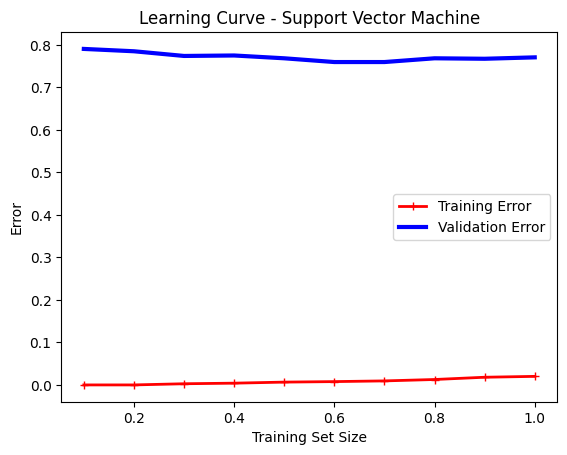

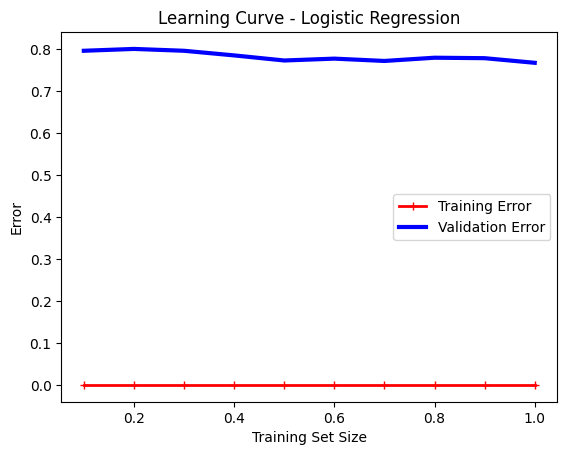

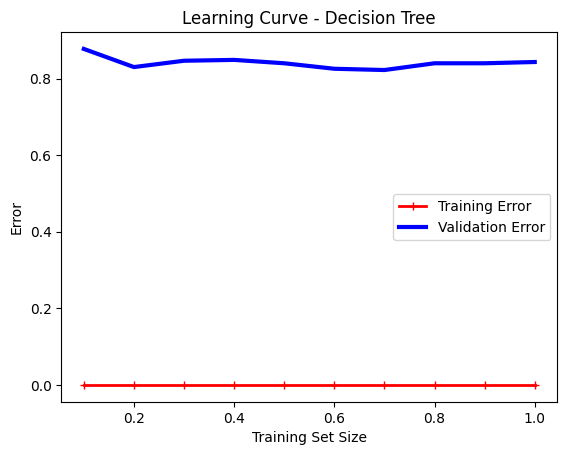

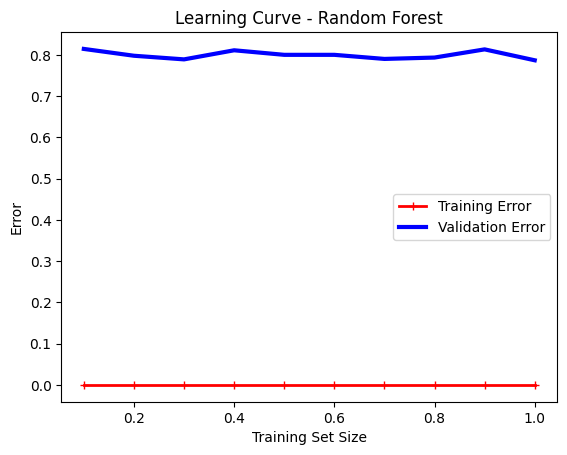

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                        precision    recall  f1-score   support

      $1,000 to $2,999       0.09      0.10      0.09        51
    $10,000 to $14,999       0.16      0.12      0.14        72
  $120,000 to $159,999       0.11      0.08      0.10        12
    $15,000 to $19,999       0.03      0.03      0.03        40
  $160,000 to $199,999       0.00      0.00      0.00         2
    $20,000 to $24,999       0.10      0.18      0.13        34
  $200,000 to $249,999       0.00      0.00      0.00         1
    $25,000 to $29,999       0.03      0.03      0.03        39
      $250,000 or over       0.00      0.00      0.00         2
      $3,000 to $4,999       0.13      0.09      0.11        54
    $30,000 to $34,999       0.17      0.14      0.16        42
    $35,000 to $39,999       0.13      0.14      0.14        29
    $40,000 to $49,999       0.28      0.22      0.24        51
      $5,000 to $6,999       0.12      0.12      0.12        42
    $50,000 to $59,999       0.09      

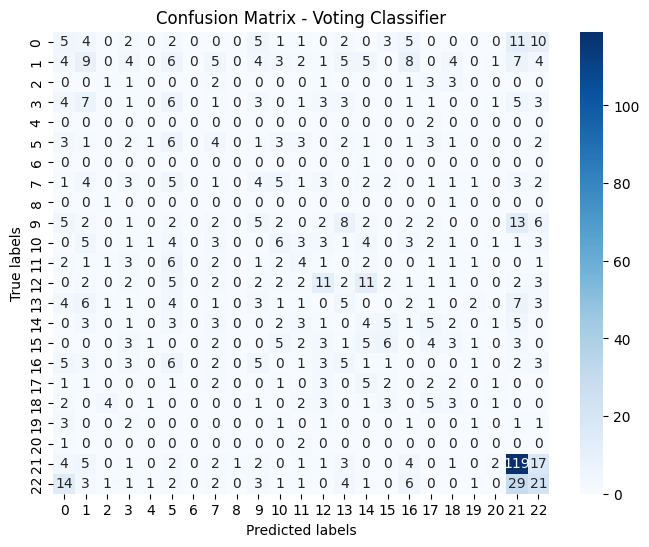

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


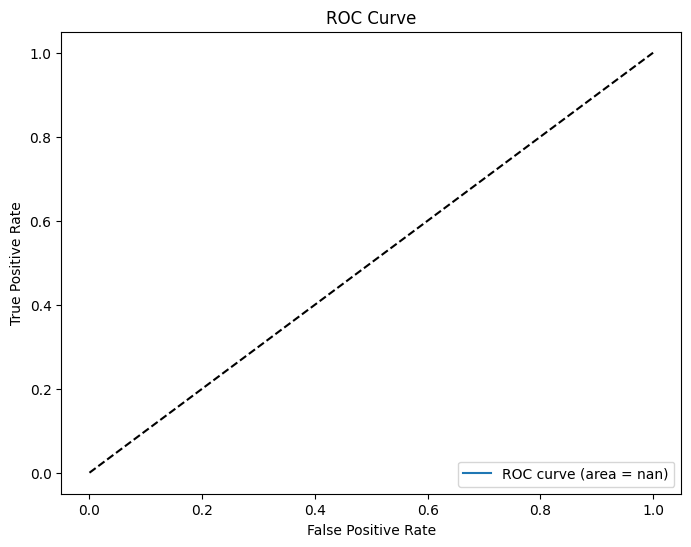

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


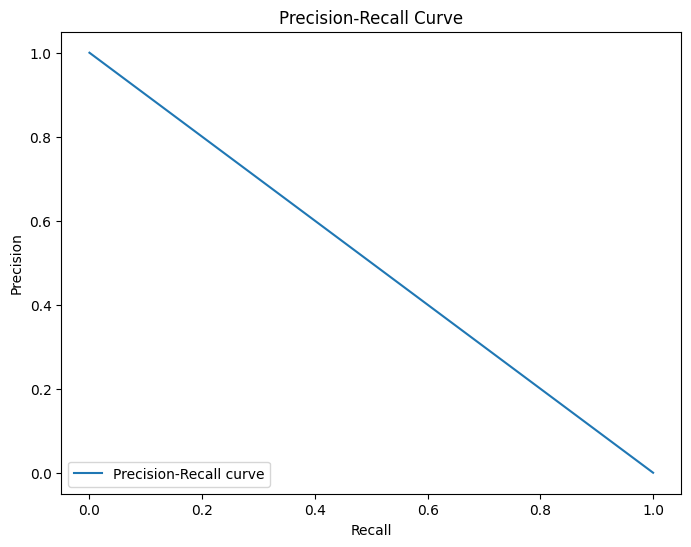


Support Vector Machine Classifier:
                        precision    recall  f1-score   support

      $1,000 to $2,999       0.10      0.14      0.11        51
    $10,000 to $14,999       0.15      0.15      0.15        72
  $120,000 to $159,999       0.17      0.08      0.11        12
    $15,000 to $19,999       0.00      0.00      0.00        40
  $160,000 to $199,999       0.00      0.00      0.00         2
    $20,000 to $24,999       0.04      0.09      0.06        34
  $200,000 to $249,999       0.00      0.00      0.00         1
    $25,000 to $29,999       0.04      0.05      0.05        39
      $250,000 or over       0.00      0.00      0.00         2
      $3,000 to $4,999       0.21      0.19      0.20        54
    $30,000 to $34,999       0.06      0.05      0.05        42
    $35,000 to $39,999       0.13      0.10      0.12        29
    $40,000 to $49,999       0.18      0.16      0.17        51
      $5,000 to $6,999       0.17      0.14      0.15        42
   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


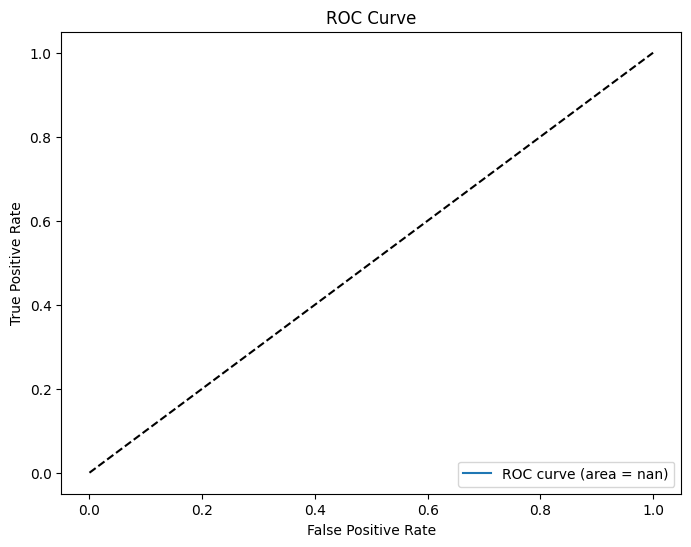

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


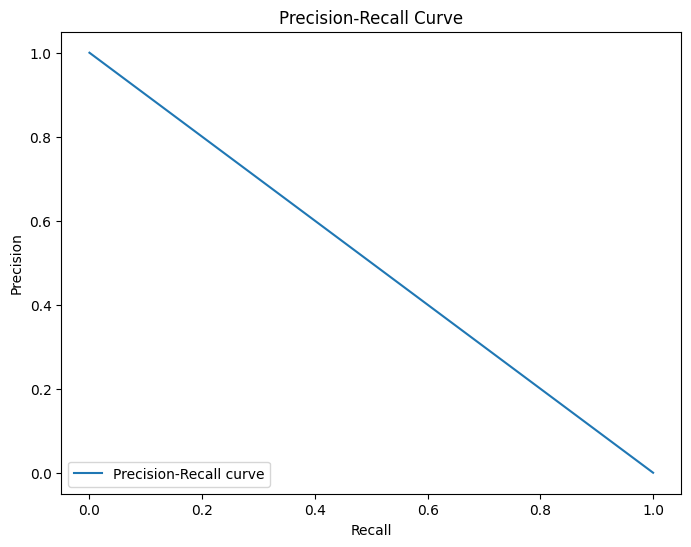

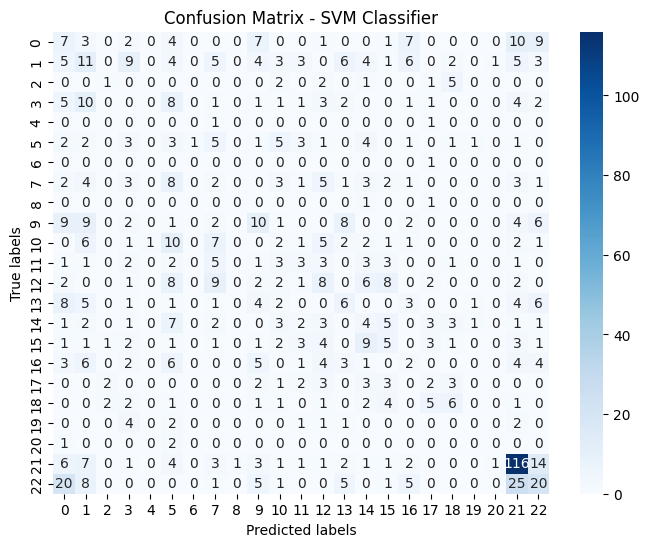


Logistic Regression Classifier:
                        precision    recall  f1-score   support

      $1,000 to $2,999       0.11      0.12      0.11        51
    $10,000 to $14,999       0.15      0.15      0.15        72
  $120,000 to $159,999       0.33      0.08      0.13        12
    $15,000 to $19,999       0.02      0.03      0.02        40
  $160,000 to $199,999       0.00      0.00      0.00         2
    $20,000 to $24,999       0.06      0.09      0.07        34
  $200,000 to $249,999       1.00      0.00      0.00         1
    $25,000 to $29,999       0.08      0.08      0.08        39
      $250,000 or over       1.00      0.00      0.00         2
      $3,000 to $4,999       0.17      0.13      0.15        54
    $30,000 to $34,999       0.17      0.14      0.16        42
    $35,000 to $39,999       0.12      0.10      0.11        29
    $40,000 to $49,999       0.22      0.20      0.21        51
      $5,000 to $6,999       0.17      0.17      0.17        42
    $5

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


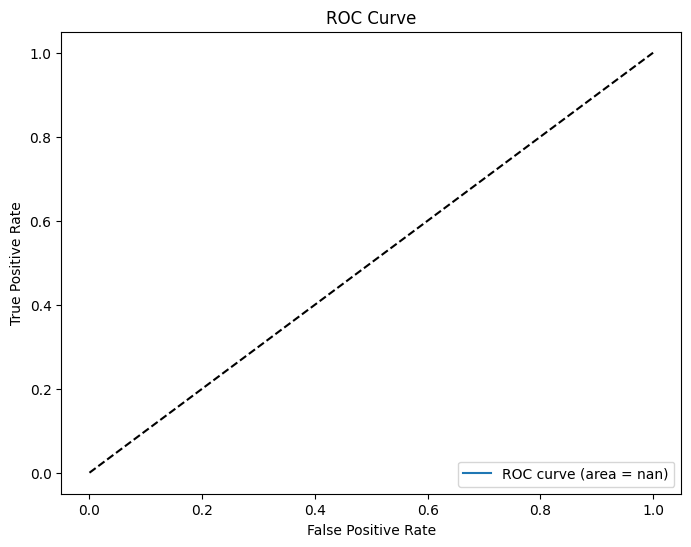

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


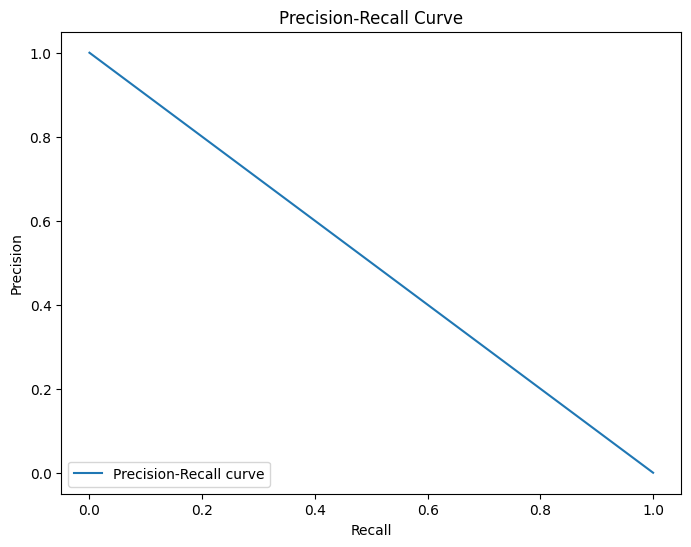

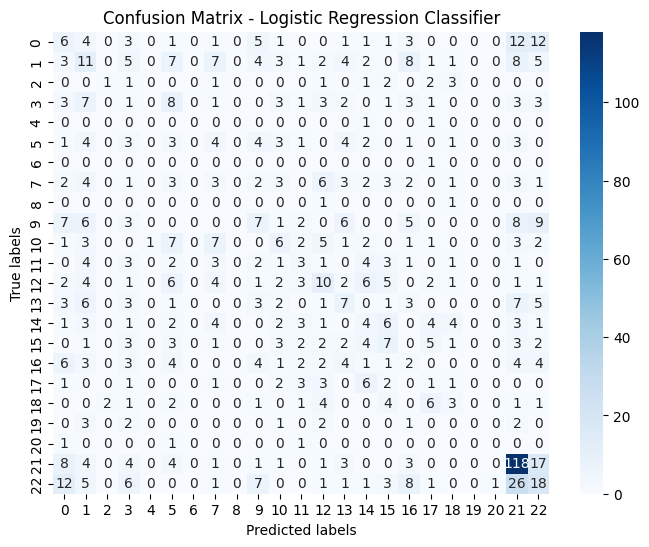


Decision Tree Classifier:
                        precision    recall  f1-score   support

      $1,000 to $2,999       0.09      0.12      0.10        51
    $10,000 to $14,999       0.04      0.03      0.03        72
  $120,000 to $159,999       0.00      0.00      0.00        12
    $15,000 to $19,999       0.05      0.03      0.03        40
  $160,000 to $199,999       0.00      0.00      0.00         2
    $20,000 to $24,999       0.03      0.06      0.04        34
  $200,000 to $249,999       1.00      0.00      0.00         1
    $25,000 to $29,999       0.17      0.15      0.16        39
      $250,000 or over       0.00      0.00      0.00         2
      $3,000 to $4,999       0.06      0.06      0.06        54
    $30,000 to $34,999       0.10      0.07      0.08        42
    $35,000 to $39,999       0.05      0.07      0.06        29
    $40,000 to $49,999       0.07      0.06      0.07        51
      $5,000 to $6,999       0.18      0.19      0.19        42
    $50,000 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


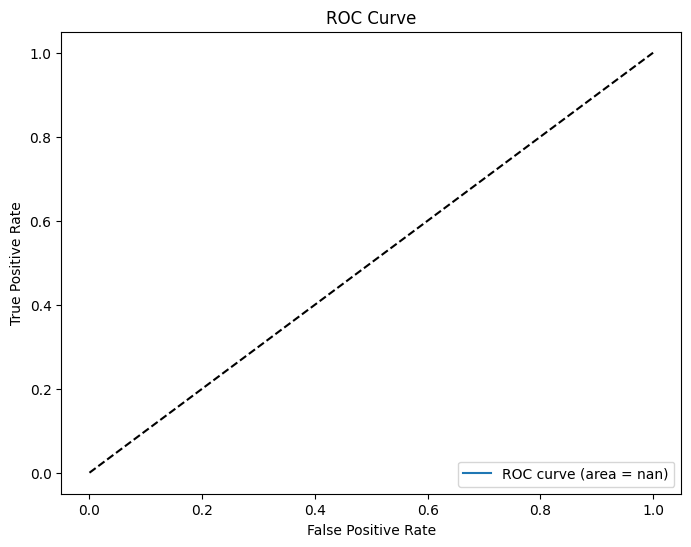

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


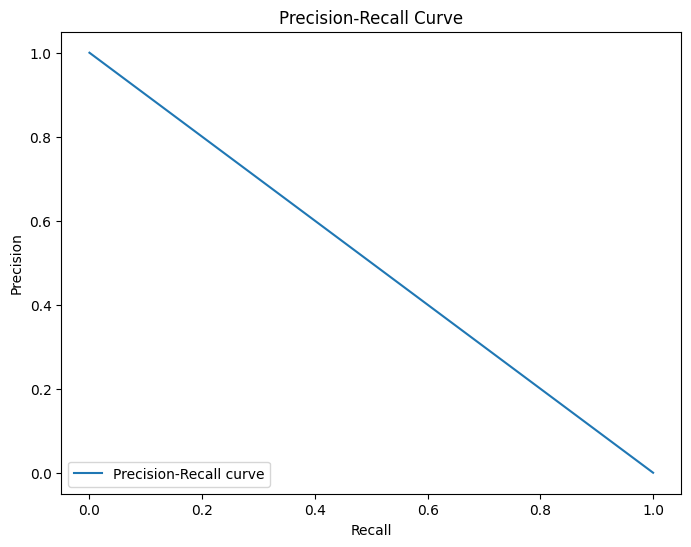

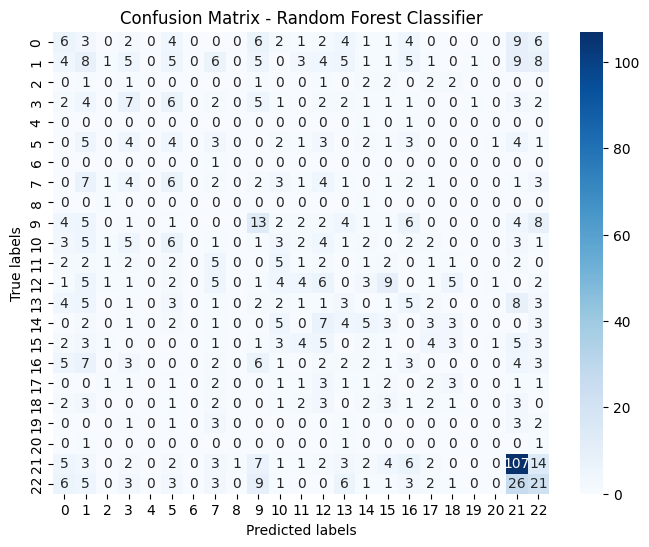

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
cols_to_preprocess = [
    # Demographics and Personal Information
    '25. With which of these groups do you primarily identify?',
    '26. Which part of the world do you live in?',
    '27. If you are living in the US, which state do you currently live in? ',
    '29. Is your country of citizenship different from the country where you live?',
    '30. Are you an ethnic minority in your country?',
    '31. Is English your second language?',
    '32. What is the highest degree or level of school you have completed?',
    '35. What\'s your marital status?',
    '36. How many children do you have? By children, we mean any biological, step, or adopted children.',
    '47. Have you served in your country\'s military before?',
    '48. Do you currently receive disability benefits from your government?',
    '49. Do you have high speed internet at your home?',
    # Educational and Professional Information
    '8. About how many months have you been programming?',
    '9. Aside from university tuition, about how much money have you spent on learning to code so far (in US Dollars)?',
    '10. Are you already employed in a software development job?',
    '11. If you are already employed as a developer, is this your first software development job? ',
    '12. If you are NOT already a developer, are you interested in a software development career?',
    '16. About how much money do you expect to earn per year at your first developer job (in US Dollars)? ',
    '18. After the pandemic, how many days would you ideally like to work from home versus in an office each week?',
    '21. If you are currently working, which field do you work in?',
    '22. About how much money did you earn last year from any job or employment (in US Dollars)? ',
    # Learning and Skill Development
    '1. What is your biggest reason for learning to code?',
    '2. What methods have you used to learn about coding? Please select all that apply.',
    '3. Which online learning resources have you found helpful? Please select all that apply.',
    '4. If you have attended in-person coding-related events before, which ones have you found helpful? Please select all that apply.',
    '5. If you have listened to coding-related podcasts before, which ones have you found helpful? Please select all that apply.',
    '6. If you have watched coding-related YouTube videos before, which channels have you found helpful? Please select all that apply.',
    # Job Satisfaction and Work-Life
    '44. Do you consider yourself under-employed? (Under-employment means working a job that is below your education level.)',
    '45. Please tell us how satisfied you are with each of these following aspects of your present job [Earnings]',
    '45. Please tell us how satisfied you are with each of these following aspects of your present job [Benefits]',
    '45. Please tell us how satisfied you are with each of these following aspects of your present job [Job security]',
    '45. Please tell us how satisfied you are with each of these following aspects of your present job [Work-life balance]',
    '45. Please tell us how satisfied you are with each of these following aspects of your present job [Professional growth or leadership opportunities]',
    '45. Please tell us how satisfied you are with each of these following aspects of your present job [Workplace/company culture]',
    '45. Please tell us how satisfied you are with each of these following aspects of your present job [Diverse and inclusive work environment]',
    '45. Please tell us how satisfied you are with each of these following aspects of your present job [Weekly workload]'
]

# Handle missing values if any (for demonstration, assuming dropna for simplicity)
data.dropna(inplace=True)


# Remove the target variable from features
cols_to_preprocess.remove('22. About how much money did you earn last year from any job or employment (in US Dollars)? ')

# Define features and target
X = data[cols_to_preprocess]
y = data['22. About how much money did you earn last year from any job or employment (in US Dollars)? ']


# Identify categorical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
# Convert columns with mixed types to strings
for col in categorical_features:
   X = X.copy()
   X.loc[:, col] = X[col].astype(str)
# Define numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Define transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'
)

# Create pipeline with preprocessing steps
pipeline = Pipeline([
    ('preprocessor', preprocessor)
])


# Fit and transform the data
X_scaled = pipeline.fit_transform(X)
# Split the scaled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# Drop rows with NaN values in the target variable y_test
y_test = y_test.dropna()
# Apply SMOTE for oversampling only on the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


# Train models on resampled training data
svm_model = SVC(kernel='linear',probability=True, C=1.0, random_state=42,gamma='scale',shrinking = True)
lr_model = LogisticRegression(max_iter=1000, penalty='l2', solver='newton-cg', C=100, class_weight=None, warm_start=False)
dt_classifier = DecisionTreeClassifier(random_state=42,max_depth= None, min_samples_split= 2,splitter='random',max_features = 'log2',)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42,criterion = 'entropy',max_features = None, min_samples_leaf = 1,bootstrap = False)



def plot_learning_curve(model, X_train, y_train, X_test, y_test, title):
    train_errors, val_errors = [], []
    sizes = np.linspace(0.1, 1.0, 10)  # 10 intervals for different training set sizes
    for size in sizes:
        # Select a subset of the training data
        subset_size = int(size * X_train.shape[0])
        X_subset = X_train[:subset_size]
        y_subset = y_train[:subset_size]

        # Train the model
        model.fit(X_subset, y_subset)

        # Predict on training and validation sets
        train_pred = model.predict(X_subset)
        val_pred = model.predict(X_test)

        # Calculate accuracy scores
        train_error = 1 - accuracy_score(y_subset, train_pred)
        val_error = 1 - accuracy_score(y_test, val_pred)

        train_errors.append(train_error)
        val_errors.append(val_error)

    # Plotting
    plt.plot(sizes, train_errors, "r-+", linewidth=2, label="Training Error")
    plt.plot(sizes, val_errors, "b-", linewidth=3, label="Validation Error")
    plt.title(title)
    plt.xlabel("Training Set Size")
    plt.ylabel("Error")
    plt.legend()
    plt.show()

def plot_curves(model, X_test, y_test):
    # Convert target variable to binary integer labels
    y_test_binary = (y_test == 'high income').astype(int)  # Assuming 'high income' is the positive class

    # Compute the predicted probabilities
    y_pred_prob = model.predict_proba(X_test)

    # Plotting ROC curve
    fpr, tpr, _ = roc_curve(y_test_binary, y_pred_prob[:, 1])
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:0.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    # Plotting Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_test_binary, y_pred_prob[:, 1])

    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label='Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")
    plt.show()

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()
# Using the function for each model
plot_learning_curve(svm_model, X_train, y_train, X_test, y_test, "Learning Curve - Support Vector Machine")
plot_learning_curve(lr_model, X_train, y_train, X_test, y_test, "Learning Curve - Logistic Regression")
plot_learning_curve(dt_classifier, X_train, y_train, X_test, y_test, "Learning Curve - Decision Tree")
plot_learning_curve(rf_classifier, X_train, y_train, X_test, y_test, "Learning Curve - Random Forest")

# Make predictions
svm_pred = svm_model.predict(X_test)
lr_pred = lr_model.predict(X_test)
dt_pred = dt_classifier.predict(X_test)
rf_pred = rf_classifier.predict(X_test)
# Create a Voting Classifier with soft voting
voting_classifier = VotingClassifier(
    estimators=[('dt', dt_classifier), ('svm', svm_model), ('lr', lr_model)],
    voting='soft'  # Use 'hard' for hard voting
)

# Fit the Voting Classifier on the resampled training data
voting_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_voting = voting_classifier.predict(X_test)

# Evaluate the Voting Classifier
print(classification_report(y_test, y_pred_voting))
plot_confusion_matrix(y_test, y_pred_voting, "Confusion Matrix - Voting Classifier")
plot_curves(voting_classifier, X_test, y_test)
# Evaluation
print("\nSupport Vector Machine Classifier:")
print(classification_report(y_test, svm_pred, zero_division=1))
plot_curves(svm_model, X_test, y_test)
plot_confusion_matrix(y_test, svm_pred, "Confusion Matrix - SVM Classifier")


print("\nLogistic Regression Classifier:")
print(classification_report(y_test, lr_pred, zero_division=1))
plot_curves(lr_model, X_test, y_test)
plot_confusion_matrix(y_test, lr_pred, "Confusion Matrix - Logistic Regression Classifier")


print("\nDecision Tree Classifier:")
print(classification_report(y_test, dt_pred, zero_division=1))
# plot_curves(dt_classifier, X_test, y_test)
# plot_confusion_matrix(y_test, dt_pred, "Confusion Matrix - Decison tree Classifier")


print("\nRandom Forest Classifier:")
print(classification_report(y_test, rf_pred, zero_division=1))
plot_curves(rf_classifier, X_test, y_test)
plot_confusion_matrix(y_test, rf_pred, "Confusion Matrix - Random Forest Classifier")







**Binary Classification**


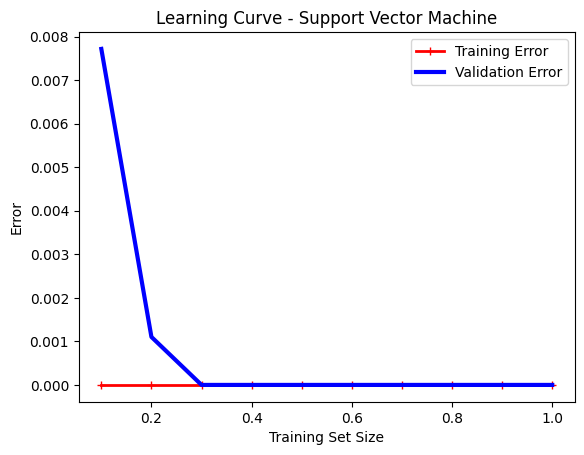

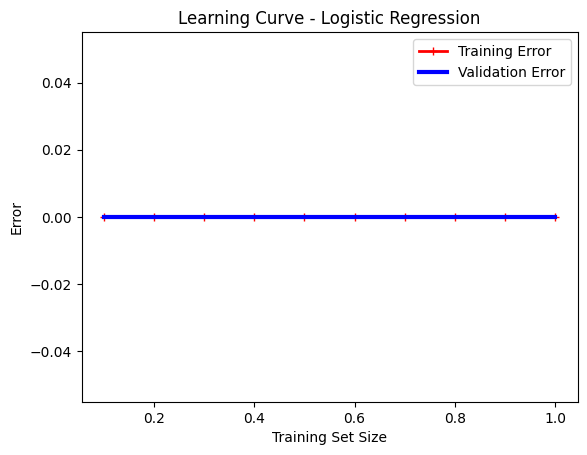

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

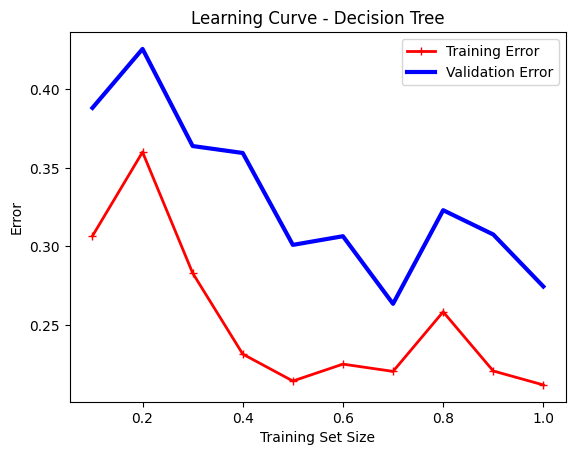

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

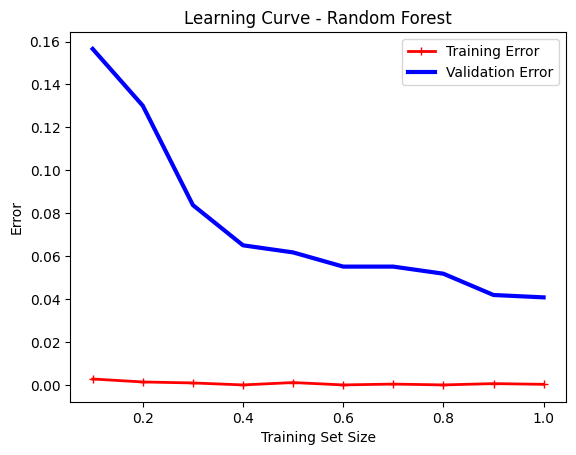

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


              precision    recall  f1-score   support

 high income       1.00      1.00      1.00       443
  low income       1.00      1.00      1.00       464

    accuracy                           1.00       907
   macro avg       1.00      1.00      1.00       907
weighted avg       1.00      1.00      1.00       907



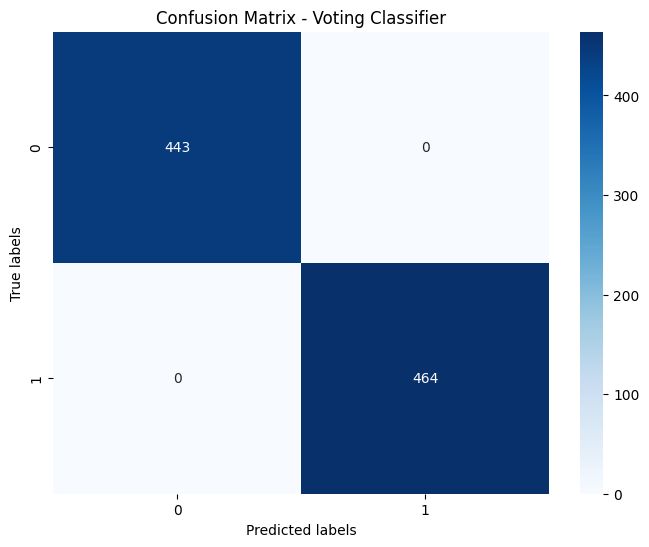

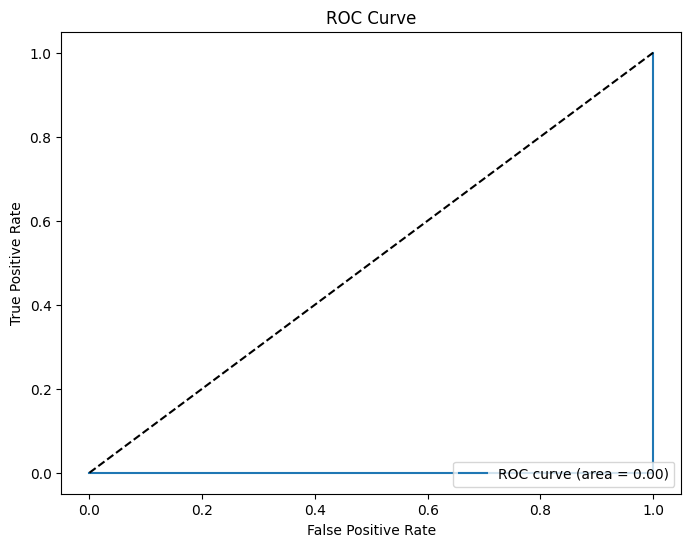

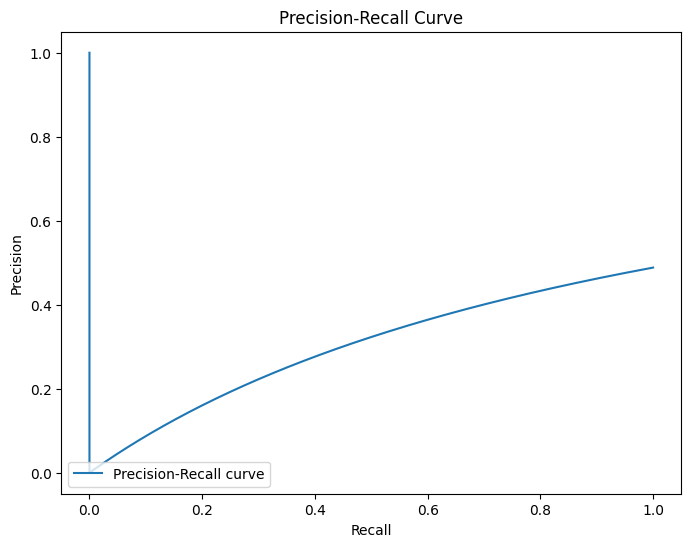


Support Vector Machine Classifier:
              precision    recall  f1-score   support

 high income       1.00      1.00      1.00       443
  low income       1.00      1.00      1.00       464

    accuracy                           1.00       907
   macro avg       1.00      1.00      1.00       907
weighted avg       1.00      1.00      1.00       907


Logistic Regression Classifier:
              precision    recall  f1-score   support

 high income       1.00      1.00      1.00       443
  low income       1.00      1.00      1.00       464

    accuracy                           1.00       907
   macro avg       1.00      1.00      1.00       907
weighted avg       1.00      1.00      1.00       907


Decision Tree Classifier:
              precision    recall  f1-score   support

 high income       0.71      0.73      0.72       443
  low income       0.74      0.72      0.73       464

    accuracy                           0.73       907
   macro avg       0.73      0.7

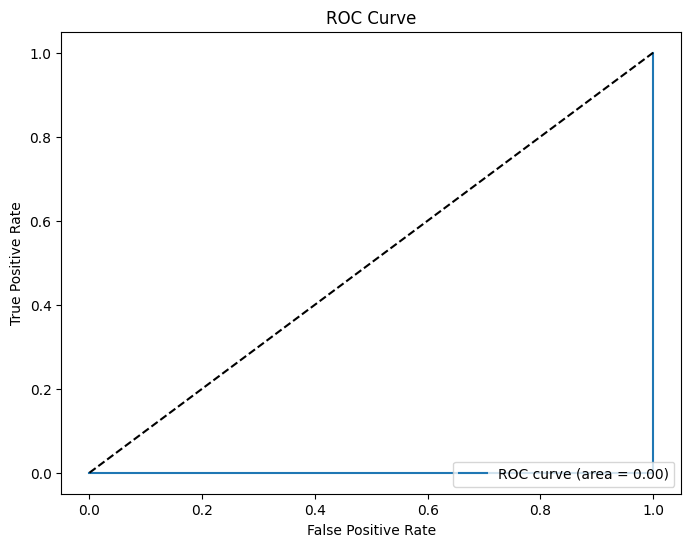

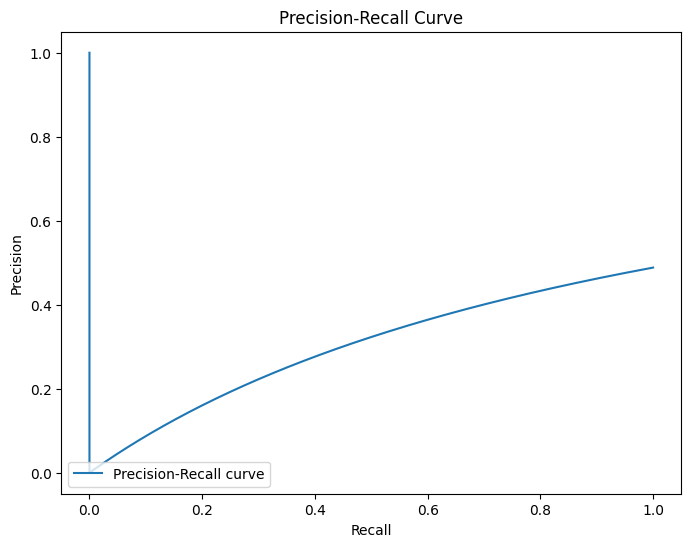

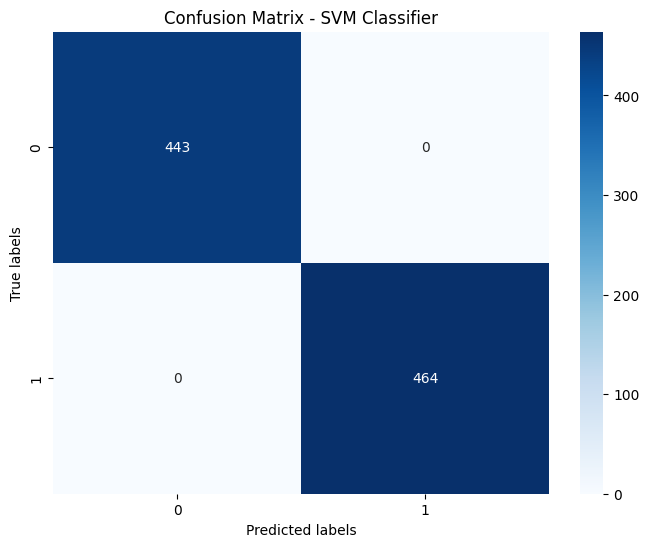

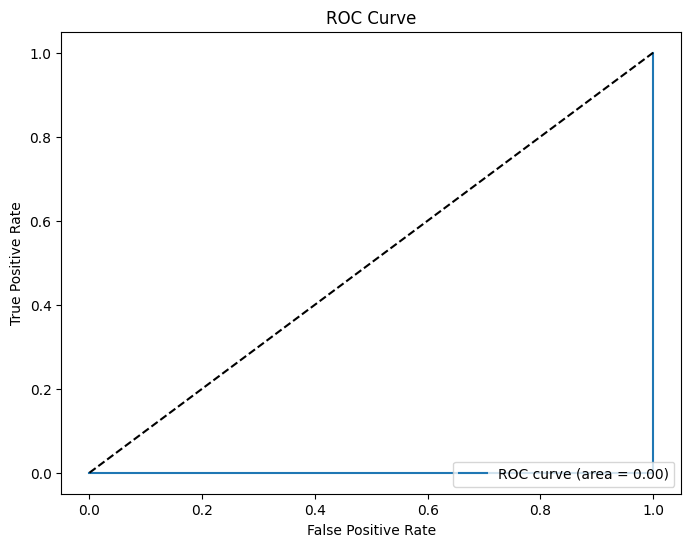

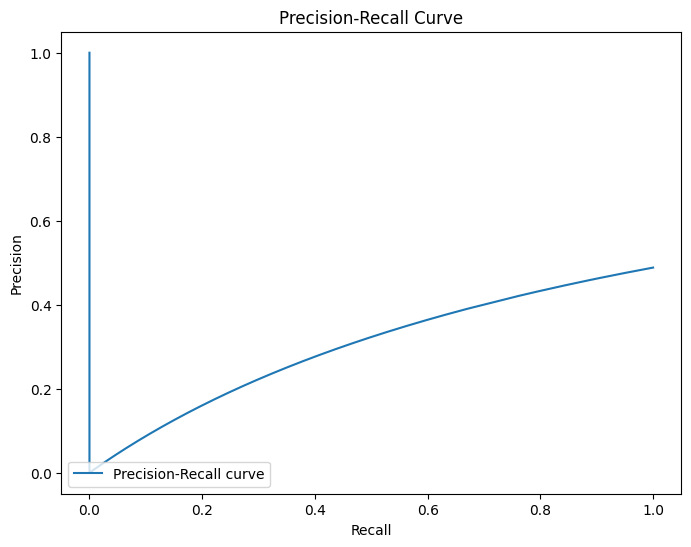

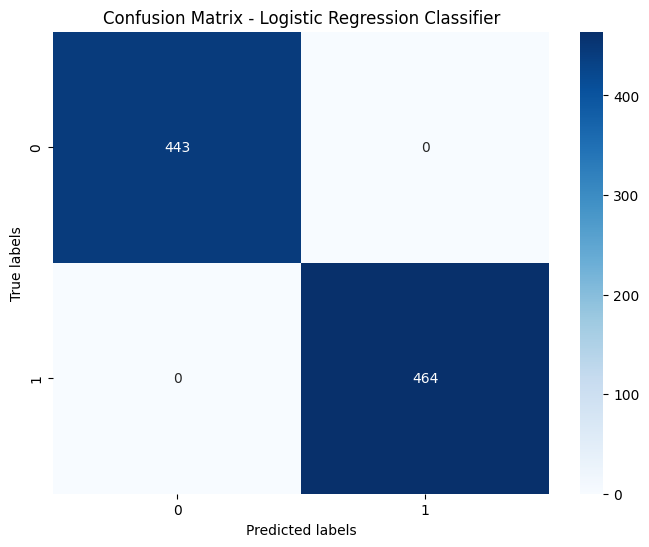

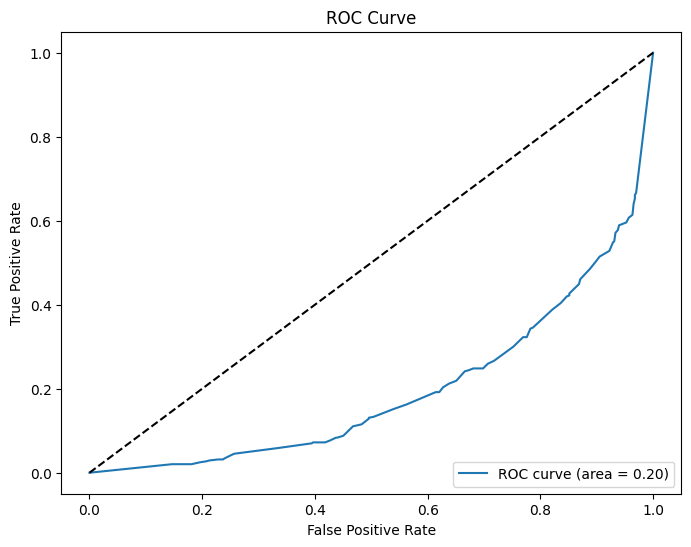

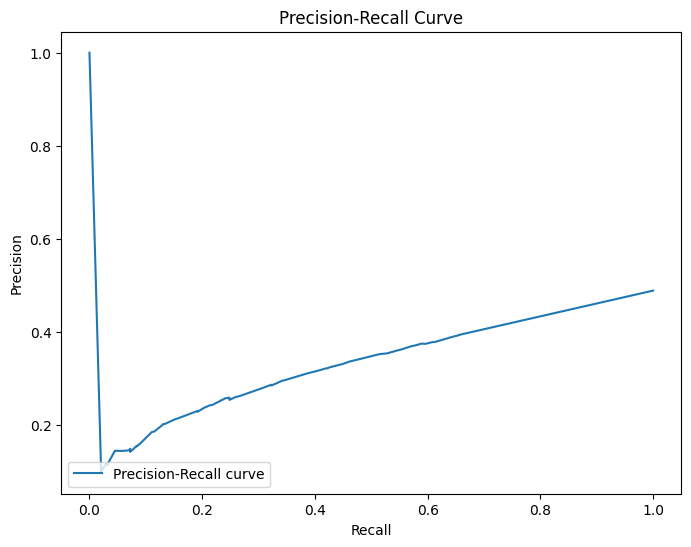

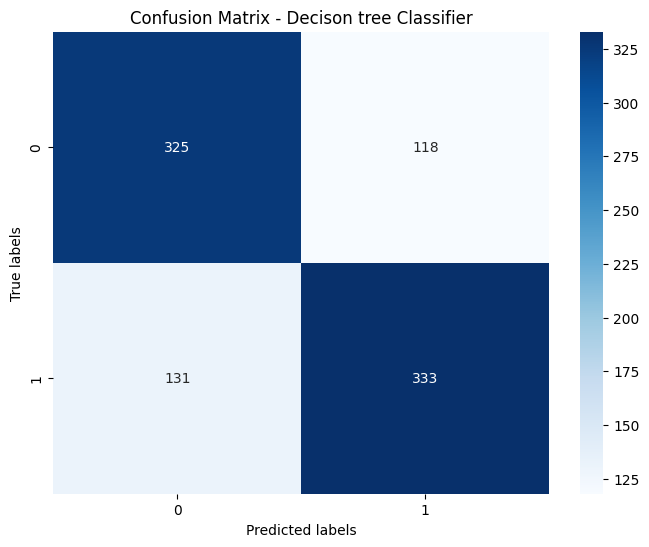

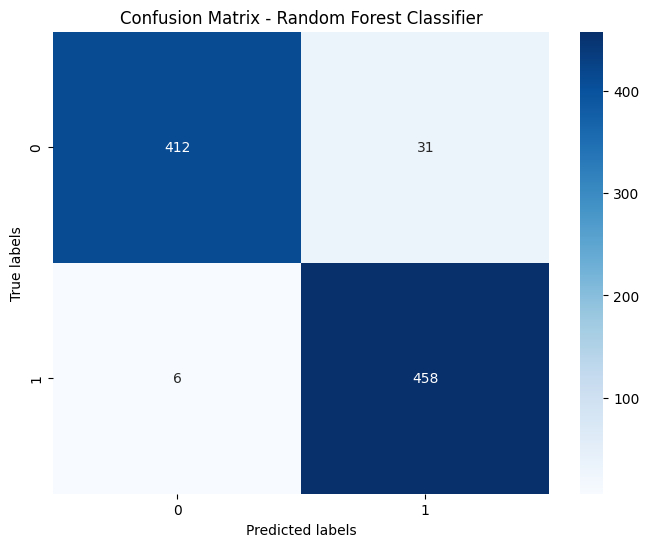

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import VotingClassifier

cols_to_preprocess = [
    # Demographics and Personal Information
    '25. With which of these groups do you primarily identify?',
    '26. Which part of the world do you live in?',
    '27. If you are living in the US, which state do you currently live in? ',
    '29. Is your country of citizenship different from the country where you live?',
    '30. Are you an ethnic minority in your country?',
    '31. Is English your second language?',
    '32. What is the highest degree or level of school you have completed?',
    '35. What\'s your marital status?',
    '36. How many children do you have? By children, we mean any biological, step, or adopted children.',
    '47. Have you served in your country\'s military before?',
    '48. Do you currently receive disability benefits from your government?',
    '49. Do you have high speed internet at your home?',
    # Educational and Professional Information
    '8. About how many months have you been programming?',
    '9. Aside from university tuition, about how much money have you spent on learning to code so far (in US Dollars)?',
    '10. Are you already employed in a software development job?',
    '11. If you are already employed as a developer, is this your first software development job? ',
    '12. If you are NOT already a developer, are you interested in a software development career?',
    '16. About how much money do you expect to earn per year at your first developer job (in US Dollars)? ',
    '18. After the pandemic, how many days would you ideally like to work from home versus in an office each week?',
    '21. If you are currently working, which field do you work in?',
    '22. About how much money did you earn last year from any job or employment (in US Dollars)? ',
    # Learning and Skill Development
    '1. What is your biggest reason for learning to code?',
    '2. What methods have you used to learn about coding? Please select all that apply.',
    '3. Which online learning resources have you found helpful? Please select all that apply.',
    '4. If you have attended in-person coding-related events before, which ones have you found helpful? Please select all that apply.',
    '5. If you have listened to coding-related podcasts before, which ones have you found helpful? Please select all that apply.',
    '6. If you have watched coding-related YouTube videos before, which channels have you found helpful? Please select all that apply.',
    # Job Satisfaction and Work-Life
    '44. Do you consider yourself under-employed? (Under-employment means working a job that is below your education level.)',
    '45. Please tell us how satisfied you are with each of these following aspects of your present job [Earnings]',
    '45. Please tell us how satisfied you are with each of these following aspects of your present job [Benefits]',
    '45. Please tell us how satisfied you are with each of these following aspects of your present job [Job security]',
    '45. Please tell us how satisfied you are with each of these following aspects of your present job [Work-life balance]',
    '45. Please tell us how satisfied you are with each of these following aspects of your present job [Professional growth or leadership opportunities]',
    '45. Please tell us how satisfied you are with each of these following aspects of your present job [Workplace/company culture]',
    '45. Please tell us how satisfied you are with each of these following aspects of your present job [Diverse and inclusive work environment]',
    '45. Please tell us how satisfied you are with each of these following aspects of your present job [Weekly workload]'
]
# Mapping income ranges to their respective values
income_mapping = {
    'Under $1,000': 500,
    '$1,000 to $2,999': 1500,
    '$3,000 to $4,999': 4000,
    '$5,000 to $6,999': 6500,
    '$7,000 to $9,999': 8000,
    '$10,000 to $14,999': 12500,
    '$15,000 to $19,999': 17500,
    '$20,000 to $24,999': 22500,
    '$25,000 to $29,999': 27500,
    '$30,000 to $34,999': 32500,
    '$35,000 to $39,999': 37500,
    '$40,000 to $49,999': 45000,
    '$50,000 to $59,999': 55000,
    '$60,000 to $74,999': 67500,
    '$75,000 to $89,999': 82500,
    '$90,000 to $119,999': 105000,
    '$120,000 to $159,999': 140000,
    '$160,000 to $199,999': 180000,
    '$200,000 to $249,999': 225000,
    '$250,000 or over': 250000
}

# Convert the income ranges to their mapped values
data['income_value'] = data['22. About how much money did you earn last year from any job or employment (in US Dollars)? '].map(income_mapping)

# Define a threshold for "low income" and "high income"
threshold = 30000  # 30k

# Create binary labels based on the threshold
data['target'] = data['income_value'].apply(lambda x: 'low income' if x < threshold else 'high income')

# Define features and target
X = data[cols_to_preprocess]
y = data['target']

# Identify categorical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Convert columns with mixed types to strings
for col in categorical_features:
   X = X.copy()
   X.loc[:, col] = X[col].astype(str)

# Define numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Define transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'
)

# Create pipeline with preprocessing steps
pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

# Fit and transform the data
X_scaled = pipeline.fit_transform(X)

# Split the scaled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42, k_neighbors=3)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


# Train models on resampled training data
svm_model = SVC(kernel='linear', probability=True,C=1.0, random_state=42)
lr_model = LogisticRegression(max_iter=1000, penalty='l1', solver='liblinear', class_weight=None)
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=None,  max_features= 'auto', min_samples_leaf = 2, min_samples_split = 5)
rf_classifier = RandomForestClassifier(n_estimators=300, random_state=42,max_depth = None, max_features = 'auto', min_samples_leaf = 1, min_samples_split = 10)

def plot_learning_curve(model, X_train, y_train, X_test, y_test, title):
    train_errors, val_errors = [], []
    sizes = np.linspace(0.1, 1.0, 10)  # 10 intervals for different training set sizes
    for size in sizes:
        # Select a subset of the training data
        subset_size = int(size * X_train.shape[0])
        X_subset = X_train[:subset_size]
        y_subset = y_train[:subset_size]

        # Train the model
        model.fit(X_subset, y_subset)

        # Predict on training and validation sets
        train_pred = model.predict(X_subset)
        val_pred = model.predict(X_test)

        # Calculate accuracy scores
        train_error = 1 - accuracy_score(y_subset, train_pred)
        val_error = 1 - accuracy_score(y_test, val_pred)

        train_errors.append(train_error)
        val_errors.append(val_error)

    # Plotting
    plt.plot(sizes, train_errors, "r-+", linewidth=2, label="Training Error")
    plt.plot(sizes, val_errors, "b-", linewidth=3, label="Validation Error")
    plt.title(title)
    plt.xlabel("Training Set Size")
    plt.ylabel("Error")
    plt.legend()
    plt.show()
def plot_curves(model, X_test, y_test):
    # Convert target variable to binary integer labels
    y_test_binary = y_test.map({'low income': 0, 'high income': 1})

    # Compute the predicted probabilities
    y_pred_prob = model.predict_proba(X_test)

    # Plotting ROC curve
    fpr, tpr, _ = roc_curve(y_test_binary, y_pred_prob[:, 1])
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:0.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    # Plotting Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_test_binary, y_pred_prob[:, 1])

    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label='Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")
    plt.show()

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()
# Using the function for each model
plot_learning_curve(svm_model, X_train, y_train, X_test, y_test, "Learning Curve - Support Vector Machine")
plot_learning_curve(lr_model, X_train, y_train, X_test, y_test, "Learning Curve - Logistic Regression")
plot_learning_curve(dt_classifier, X_train, y_train, X_test, y_test, "Learning Curve - Decision Tree")
plot_learning_curve(rf_classifier, X_train, y_train, X_test, y_test, "Learning Curve - Random Forest")

# Make predictions
svm_pred = svm_model.predict(X_test)
lr_pred = lr_model.predict(X_test)
dt_pred = dt_classifier.predict(X_test)
rf_pred = rf_classifier.predict(X_test)
# Create a Voting Classifier with soft voting
voting_classifier = VotingClassifier(
    estimators=[('dt', dt_classifier), ('svm', svm_model), ('lr', lr_model)],
    voting='soft'  # Use 'hard' for hard voting
)

# Fit the Voting Classifier on the resampled training data
voting_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_voting = voting_classifier.predict(X_test)

# Evaluate the Voting Classifier
print(classification_report(y_test, y_pred_voting))
plot_confusion_matrix(y_test, y_pred_voting, "Confusion Matrix - Voting Classifier")
plot_curves(voting_classifier, X_test, y_test)

# Evaluation
print("\nSupport Vector Machine Classifier:")
print(classification_report(y_test, svm_pred, zero_division=1))



print("\nLogistic Regression Classifier:")
print(classification_report(y_test, lr_pred, zero_division=1))



print("\nDecision Tree Classifier:")
print(classification_report(y_test, dt_pred, zero_division=1))


print("\nRandom Forest Classifier:")
print(classification_report(y_test, rf_pred, zero_division=1))

plot_curves(svm_model, X_test, y_test)
plot_confusion_matrix(y_test, svm_pred, "Confusion Matrix - SVM Classifier")

plot_curves(lr_model, X_test, y_test)
plot_confusion_matrix(y_test, lr_pred, "Confusion Matrix - Logistic Regression Classifier")

plot_curves(dt_classifier, X_test, y_test)
plot_confusion_matrix(y_test, dt_pred, "Confusion Matrix - Decison tree Classifier")

# plot_curves(rf_classifier, X_test, y_test)
plot_confusion_matrix(y_test, rf_pred, "Confusion Matrix - Random Forest Classifier")